<a href="https://colab.research.google.com/github/nbarnett19/Computational_Language_Tech/blob/Natalie/Stage_1_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1: Data Cleaning, Preprocessing and exploratory data analysis including topic modelling

Stage 1: Data cleaning, preprocessing, and exploratory data analysis including topic modelling

In this step, students get a first overview of the dataset and learn to prepare it for the subsequent NLP analyses. This could involve the following tasks:

- Data Collection and Cleaning
     - Acquire a comprehensive dataset of cleantech texts.
     - Perform data cleaning to remove irrelevant information, special characters, and duplicates.
- Text Preprocessing
    - Tokenize the text data into words or phrases.
    - Apply stemming or lemmatization to reduce words to their root form.
    - Remove stop words and non-informative terms.
    - Convert text to lowercase for consistency.
    - Exploratory Data Analysis (EDA)
    - Compute basic statistics such as word counts, document lengths, and term frequencies.
    - Create word clouds to visualize the most frequent terms.
    - Plot histograms or bar charts to analyze the distribution of major cleantech topics and categories.
    - Identify outliers or anomalies in the data.
    - Visualize the distribution of texts with scatter plots or other suitable visualization techniques.
- Topic Modeling
    - Test topic modeling techniques such as LDA and NMF
    (https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF), Top2Vec
    (https://github.com/ddangelov/Top2Vec) and BERTopic
    (https://github.com/MaartenGr/BERTopic).
    - Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.
    - Evaluate the quality of the topics.
    - Refine the topic model based on evaluation results and domain expertise.

Outputs:
- Notebook with data cleaning and preprocessing steps.
- EDA notebook with visualizations on e.g., hidden topics.

## Import Libraries

In [ ]:
!python -m spacy download en_core_web_sm

import numpy as np
import pandas as pd
import nltk
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re

nlp = spacy.load('en_core_web_sm')

2023-11-27 19:13:45.429507: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 19:13:45.515056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 19:13:45.515107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 19:13:45.518828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 19:13:45.534836: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 19:13:45.535132: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [ ]:
# Download nltk packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from string import punctuation

## Load the Data

First step is to load data from the csv file into a dataframe.

In [ ]:
!wget https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
!unzip /content/cleantech_media_dataset_v1_20231109.zip

--2023-11-27 19:14:02--  https://github.com/nbarnett19/Computational_Language_Tech/raw/Main/cleantech_media_dataset_v1_20231109.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip [following]
--2023-11-27 19:14:02--  https://raw.githubusercontent.com/nbarnett19/Computational_Language_Tech/Main/cleantech_media_dataset_v1_20231109.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14880158 (14M) [application/zip]
Saving to: ‘cleantech_media_dataset_v1_20231109.zip.1’

cleantech_media_dat 100%[===================>]

In [ ]:
df = pd.read_csv("cleantech_media_dataset_v1_20231109.csv")

In [ ]:
# Inspect dataframe
pd.DataFrame.head(df)

Unnamed: 0                                              title        date  \
0        1280  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1        1281               India Launches Its First 700 MW PHWR  2021-01-15   
2        1283              New Chapter for US-China Energy Trade  2021-01-20   
3        1284  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4        1285     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

  author                                            content       domain  \
0    NaN  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1    NaN  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2    NaN  ["New US President Joe Biden took office this ...  energyintel   
3    NaN  ["The slow pace of Japanese reactor restarts c...  energyintel   
4    NaN  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  
0  https://www.energyintel.com/0000017b-a7dc-de4c...  
1  https://www.energyintel.com/0000017b-a7dc-de4c...  
2  https://www.energyintel.com/0000017b-a7dc-de4c...  
3  https://www.energyintel.com/0000017b-a7dc-de4c...  
4  https://www.energyintel.com/0000017b-a7dc-de4c...

The article contents are contained in the 'content' column. This will be the main target for the topic modelling. The author column appears to contain mainly NaNs.

In [ ]:
# Inspect dataframe shape
df.shape

(9607, 7)

The dataframe contains 9607 records and 7 attributes.

In [ ]:
# Check for NAs
print(df.isnull().sum())

Unnamed: 0       0
title            0
date             0
author        9576
content          0
domain           0
url              0
dtype: int64


There are no NAs in the title or content columns which are the most important for topic modelling. However, author column has alomst no data so we can drop this column.

## Preprocessing

We create a function to apply the first preprocessing steps. This includes dropping any duplicated records, changing the contents to lower case, removing non alpha-numeric characters, tokenizing the contents and adding a word count.

In [ ]:
def preprocess_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['content_cleaned'] = df['content'].str.replace('\d+', '', regex=True)

    # Convert content to lower case
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: x.lower())

    # Remove symbols and punctuation (not sure about this step)
    df['content_cleaned'] = df['content_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # Tokenize
    df['tokenized_content'] = df['content_cleaned'].apply(lambda x: nltk.word_tokenize(x))

    # Remove digits << Added because the tokenized numbers do not bring value to our analysis
    df['tokenized_content'] = df['tokenized_content'].replace('[0-9]+', '', regex=True)

    # Add word count column
    df['word_count'] = df['tokenized_content'].apply(lambda x: len(x))

    # Remove unused columns
    df.drop('Unnamed: 0', axis=1, inplace=True)
    df.drop('author', axis=1, inplace=True)

    return df

df = preprocess_data(df)

In [ ]:
df[['content_cleaned', 'tokenized_content', 'word_count']].head()

content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cu...   
1   nuclear power corp of india ltd  npcil synchr...   
2  new us president joe biden took office this we...   
3  the slow pace of japanese reactor restarts con...   
4  two of new york citys largest pension funds sa...   

                                   tokenized_content  word_count  
0  [qatar, petroleum, qp, is, targeting, aggressi...         415  
1  [nuclear, power, corp, of, india, ltd, npcil, ...         518  
2  [new, us, president, joe, biden, took, office,...         679  
3  [the, slow, pace, of, japanese, reactor, resta...         663  
4  [two, of, new, york, citys, largest, pension, ...         384

Now we can remove stops. Below we test three different stop word lists.

In [ ]:
# Remove stops
stop_words_nltk = set(nltk.corpus.stopwords.words("english"))
stops_nltk = df['tokenized_content'].apply(lambda x:
                    [token for token in x if token not in stop_words_nltk])

stop_words_spacy = nlp.Defaults.stop_words
stops_spacy = df['tokenized_content'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])

from gensim.parsing.preprocessing import STOPWORDS

stop_words_gensim = STOPWORDS
stops_gensim = df['tokenized_content'].apply(lambda x: [word for word in x if word.lower() not in stop_words_gensim])

print(len(stops_gensim[0]))
print(len(stops_nltk[0]))
print(len(stops_spacy[0]))

236
252
236


Nltk seems to have removed more stop words. We can choose this one for our pre-processing.

In [ ]:
df['stops_removed'] = stops_nltk
df.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2  ["New US President Joe Biden took office this ...  energyintel   
3  ["The slow pace of Japanese reactor restarts c...  energyintel   
4  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                     content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cu...   
1   nuclear power corp of india ltd  npcil synchr...   
2  new us president joe biden took office this we...   
3  the slow pace of japanese reactor restarts con...   
4  two of new york citys largest pension funds sa...   

                                   tokenized_content  word_count  \
0  [qatar, petroleum, qp, is, targeting, aggressi...         415   
1  [nuclear, power, corp, of, india, ltd, npcil, ...         518   
2  [new, us, president, joe, biden, took, office,...         679   
3  [the, slow, pace, of, japanese, reactor, resta...         663   
4  [two, of, new, york, citys, largest, pension, ...         384   

                                       stops_removed  
0  [qatar, petroleum, qp, targeting, aggressive, ...  
1  [nuclear, power, corp, india, ltd, npcil, sync...  
2  [new, us, president, joe, biden, took, office,...  
3  [slow, pace, japanese, reactor, restarts, cont...  
4  [two, new, york, citys, largest, pension, fund...

Next we can lemmatize words. In the next step we compare two lemmatizers: nltk and spaCy.

In [ ]:
# Create lemmatizer
lemmatizer = nltk.WordNetLemmatizer()
nltk_lemma = df['stops_removed'].apply(lambda x:
                    [lemmatizer.lemmatize(word) for word in x])

nltk_lemma

0       [qatar, petroleum, qp, targeting, aggressive, ...
1       [nuclear, power, corp, india, ltd, npcil, sync...
2       [new, u, president, joe, biden, took, office, ...
3       [slow, pace, japanese, reactor, restarts, cont...
4       [two, new, york, city, largest, pension, fund,...
                              ...                        
9602    [stratum, clean, energy, closed, million, revo...
9603    [global, renewable, energy, developer, rsted, ...
9604    [veolia, north, america, provider, environment...
9605    [selfproclaimed, leading, renewable, power, pl...
9606    [arevon, energy, inc, closed, financing, vikin...
Name: stops_removed, Length: 9607, dtype: object

Here we can see that the nltk lemmatizer hasn't successfully lemmatized words such as "closed", "reviving" etc. This could cause problems when do the topic modelling. Next we see if the spaCy lemmatizer has the same problems.

In [ ]:
# spacy_lemma = df['stops_removed'].apply(lambda x:
#                     [token.lemma_ for token in nlp(" ".join(x))])
# spacy_lemma

In [ ]:
# from textblob import TextBlob, Word

# # create a TextBlob for our series
# # lemmatize each word
# sent_tb = TextBlob(str(df.stops_removed))
# blob_lemmas = [word.lemmatize() for word in sent_tb.words]

# blob_lemmas

The spaCy lemmatizer seems to have done a better job. So we will use this for our processing.

In [ ]:
df['lemmatized_content'] = nltk_lemma

Added another stop removal section. This could be streamlined.

In [ ]:
# Remove stops (need to expand stopword list)
stops = set(nltk.corpus.stopwords.words("english"))
df['lemmatized_content'] = df['lemmatized_content'].apply(lambda x:
                    [token for token in x if token not in stops])

In [ ]:
# Expand stopwords list
new_stops = {"said", "result", "come", "one", "much", "work",
             "still", "need", "u"}
stops.update(new_stops)

In [ ]:
# update dataframe
df['lemmatized_content'] = df['lemmatized_content'].apply(lambda x:
                    [token for token in x if token not in stops])

Now we can make a wordcloud to get an idea of the most frequent terms in the entire corpus.

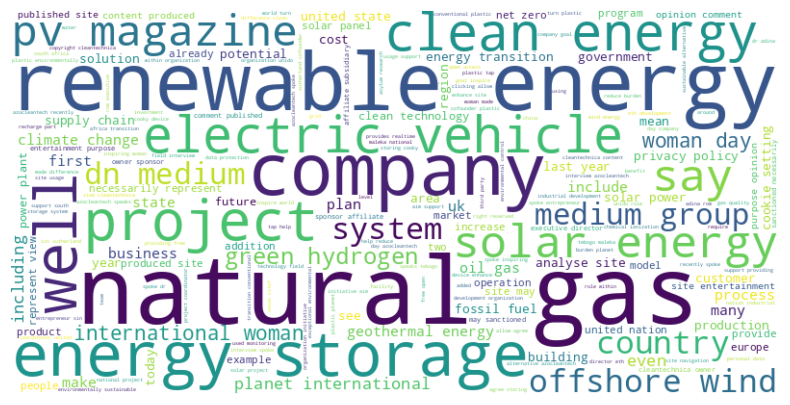

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join text for each doc
df['final_cleaned'] = df['lemmatized_content'].apply(lambda x: ' '.join(x))

# Join all text
all_tokens_string = ' '.join(df['lemmatized_content'].explode())

# Create wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From this wordcloud we can already see some potential topics. For example: natural gas, energy storage, offshore wind, electric vehicles, and solar energy. We can also see that the pre-processing has not cleaned out all redundant bits of information. For example "cookie setting" and "privacy policy" may need to be cleaned out of the corpus. This level of cleanliness may be enough to extract the main topics, however.

In [ ]:
df.head()

title        date  \
0  Qatar to Slash Emissions as LNG Expansion Adva...  2021-01-13   
1               India Launches Its First 700 MW PHWR  2021-01-15   
2              New Chapter for US-China Energy Trade  2021-01-20   
3  Japan: Slow Restarts Cast Doubt on 2030 Energy...  2021-01-22   
4     NYC Pension Funds to Divest Fossil Fuel Shares  2021-01-25   

                                             content       domain  \
0  ["Qatar Petroleum ( QP) is targeting aggressiv...  energyintel   
1  ["• Nuclear Power Corp. of India Ltd. ( NPCIL)...  energyintel   
2  ["New US President Joe Biden took office this ...  energyintel   
3  ["The slow pace of Japanese reactor restarts c...  energyintel   
4  ["Two of New York City's largest pension funds...  energyintel   

                                                 url  \
0  https://www.energyintel.com/0000017b-a7dc-de4c...   
1  https://www.energyintel.com/0000017b-a7dc-de4c...   
2  https://www.energyintel.com/0000017b-a7dc-de4c...   
3  https://www.energyintel.com/0000017b-a7dc-de4c...   
4  https://www.energyintel.com/0000017b-a7dc-de4c...   

                                     content_cleaned  \
0  qatar petroleum  qp is targeting aggressive cu...   
1   nuclear power corp of india ltd  npcil synchr...   
2  new us president joe biden took office this we...   
3  the slow pace of japanese reactor restarts con...   
4  two of new york citys largest pension funds sa...   

                                   tokenized_content  word_count  \
0  [qatar, petroleum, qp, is, targeting, aggressi...         415   
1  [nuclear, power, corp, of, india, ltd, npcil, ...         518   
2  [new, us, president, joe, biden, took, office,...         679   
3  [the, slow, pace, of, japanese, reactor, resta...         663   
4  [two, of, new, york, citys, largest, pension, ...         384   

                                       stops_removed  \
0  [qatar, petroleum, qp, targeting, aggressive, ...   
1  [nuclear, power, corp, india, ltd, npcil, sync...   
2  [new, us, president, joe, biden, took, office,...   
3  [slow, pace, japanese, reactor, restarts, cont...   
4  [two, new, york, citys, largest, pension, fund...   

                                  lemmatized_content  \
0  [qatar, petroleum, qp, targeting, aggressive, ...   
1  [nuclear, power, corp, india, ltd, npcil, sync...   
2  [new, president, joe, biden, took, office, wee...   
3  [slow, pace, japanese, reactor, restarts, cont...   
4  [two, new, york, city, largest, pension, fund,...   

                                       final_cleaned  
0  qatar petroleum qp targeting aggressive cut gr...  
1  nuclear power corp india ltd npcil synchronize...  
2  new president joe biden took office week uschi...  
3  slow pace japanese reactor restarts continues ...  
4  two new york city largest pension fund say div...

## Exploratory Analysis

First we can look at term frequencies. We can use nltk.probability.FreqDist to calculate the frequencies of terms in each document.

In [ ]:
# Calculate term frequencies for each record
df['term_frequencies'] = df['lemmatized_content'].apply(lambda x:
                        nltk.probability.FreqDist(x))

df['term_frequencies'].head()

0    {'qatar': 5, 'petroleum': 1, 'qp': 6, 'targeti...
1    {'nuclear': 4, 'power': 4, 'corp': 1, 'india':...
2    {'new': 1, 'president': 1, 'joe': 1, 'biden': ...
3    {'slow': 1, 'pace': 1, 'japanese': 1, 'reactor...
4    {'two': 2, 'new': 7, 'york': 7, 'city': 7, 'la...
Name: term_frequencies, dtype: object

Then we can get the most frequent term for each document, and the number of documents that have the same most frequent word. The histogram below shows that a large number of documents have energy as the most frequent word, followed by solar, gas, hydrogen and geothermal. We can surmise that these technologies are the main topics of a large number of articles.

We also see that "s" is the most frequent term in a large number of documents. It may therefore be useful to go back and remove this in a further cleaning step.

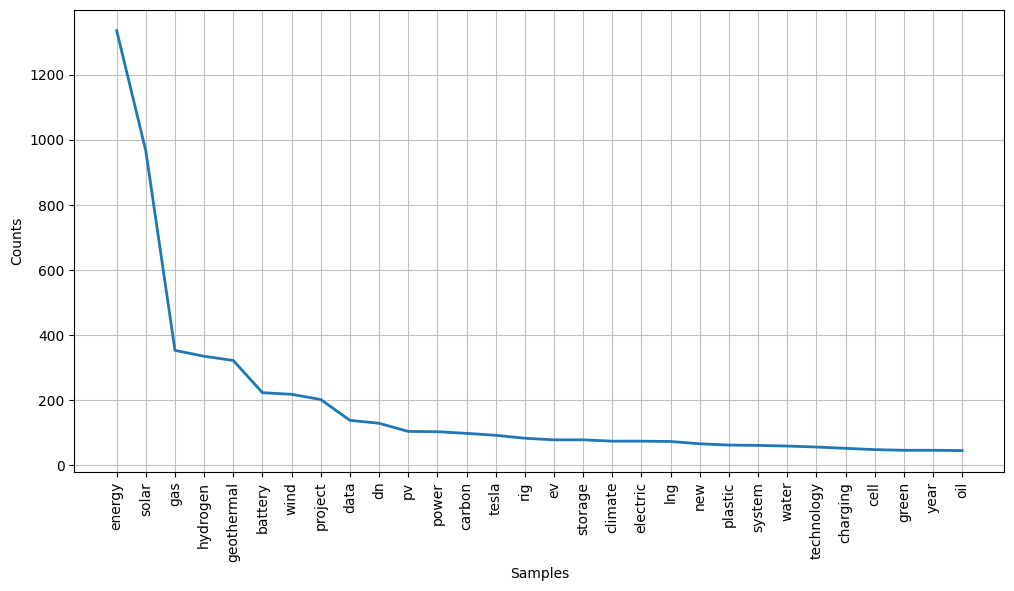

In [ ]:
# Aggregate most frequent words across all documents
freq_words = [max(term, key=term.get) for term in df['term_frequencies']]
corpus_freq_dist = nltk.probability.FreqDist(freq_words)

# Plot histogram
plt.figure(figsize=(12, 6))
corpus_freq_dist.plot(30, cumulative=False)
plt.show()

In [ ]:
# Do we need to print this? it is very long
#freq_words

In [ ]:
from pathlib import Path
from textblob import TextBlob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go

import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.core.interactiveshell import InteractiveShell

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 30

We can also take a closer look at the word frequencies by each "domain". First we can see how many articles come from each domain.

In [ ]:
df['domain'].value_counts()

cleantechnica            1861
azocleantech             1627
pv-magazine              1215
energyvoice              1020
solarindustrymag          673
naturalgasintel           659
thinkgeoenergy            646
rechargenews              559
solarpowerworldonline     505
energyintel               234
pv-tech                   232
businessgreen             158
greenprophet               80
ecofriend                  38
solarpowerportal.co        34
eurosolar                  28
decarbxpo                  19
solarquarter               17
indorenergy                 2
Name: domain, dtype: int64

Next we can compare the first document from each of the top 3 domains.

In [ ]:
# Compare three domains
cleantechnica = df[df['domain'] == 'cleantechnica']['final_cleaned']
azocleantech = df[df['domain'] == 'azocleantech']['final_cleaned']
pv_magazine = df[df['domain'] == 'pv-magazine']['final_cleaned']
print(f"pv_magazine: {pv_magazine[:1]}\nazocleantech: {azocleantech[:1]}\ncleantechnica: {cleantechnica[:1]}")

pv_magazine: 6948    pv magazine webinar discus paul wormser cea elia hinckley k l gate irs safe harbor provision sol...
Name: final_cleaned, dtype: object
azocleantech: 2629    clicking allow agree storing cooky device enhance site navigation analyse site usage support pro...
Name: final_cleaned, dtype: object
cleantechnica: 1284    first installment threepart series community solar low moderateincome costumer next piece focus ...
Name: final_cleaned, dtype: object


This is not too illuminating so we will instead go on to create a word cloud from all the documents in each of the top 3 domains.

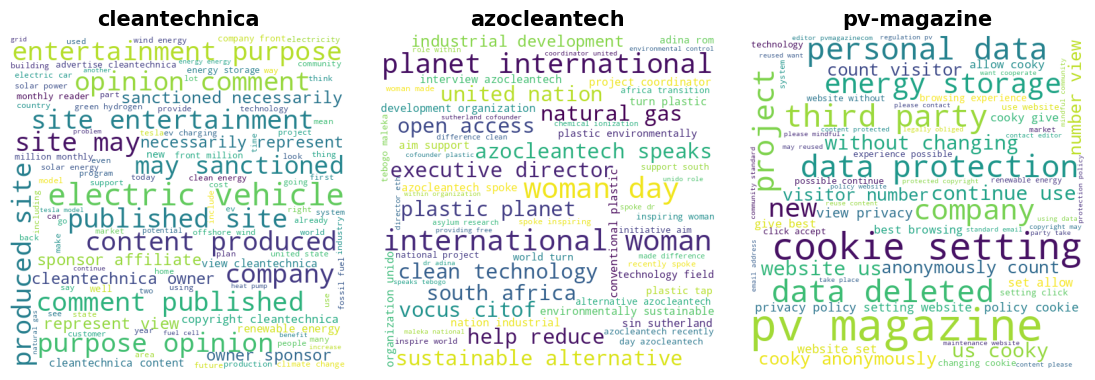

In [ ]:
rows=1
cols=3

row=0
col=0
titles = ['cleantechnica', 'azocleantech', 'pv-magazine']
w = [cleantechnica.str.cat(),azocleantech.str.cat(),pv_magazine.str.cat(),]
fig, ax = plt.subplots(1, 3, figsize=(12.5,6.5))

for i in range(3):
  ax[col].imshow(WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(w[i]))
  ax[col].axis("off")
  ax[col].set_title(titles[i], fontdict={'fontsize': 15, 'fontweight' : 'bold'})
  row=row+1
  if row==rows:
     row=0
     col=col+1

plt.subplots_adjust(left=0.07, right=0.93, wspace=0.1, hspace=0.0,top=0.94,bottom=0.09)
plt.show()

We can extrapolate from these word clouds that cleantechnica has many articles about electric vehicles. While azocleantech mentions international women's day and plastic many times. PV-magazine clearly has a data protection pop-up on its website because the most common words are about data and cookies. It may be helpful to expand our stop-word list to help filter out these words in another processing step.

We can also see that energy storage is a frequent word in PV-magazine.


With the new information we have we can expand the stop words list and go through the previous steps to generate new word clouds.

In [ ]:
# stop_words_spacy = set(stop_words_spacy)
# additional_stop_words = ["s", "cookie", "setting", "datum", "website", "azocleantech"]

# stop_words_spacy.update(additional_stop_words)

# def stop_removal(df):
#     stops_spacy = df['lemmatized_content'].apply(lambda x: [word for word in x if word.lower() not in stop_words_spacy])

#     df['stops_spacy'] = stops_spacy

#     df['final_cleaned'] = df['stops_spacy'].apply(lambda x: ' '.join(x))

#     return df

# df = stop_removal(df)

# all_tokens_string = ' '.join(df['stops_spacy'].explode())

# cleantechnica = df[df['domain'] == 'cleantechnica']['final_cleaned']
# azocleantech = df[df['domain'] == 'azocleantech']['final_cleaned']
# pv_magazine = df[df['domain'] == 'pv-magazine']['final_cleaned']

# rows=1
# cols=3

# row=0
# col=0
# titles = ['cleantechnica', 'azocleantech', 'pv-magazine']
# w = [cleantechnica.str.cat(),azocleantech.str.cat(),pv_magazine.str.cat(),]
# fig, ax = plt.subplots(1, 3, figsize=(12.5,6.5))

# for i in range(3):
#   ax[col].imshow(WordCloud(width = 500, height = 500,
#                 background_color ='white',
#                 min_font_size = 10).generate(w[i]))
#   ax[col].axis("off")
#   ax[col].set_title(titles[i], fontdict={'fontsize': 15, 'fontweight' : 'bold'})
#   row=row+1
#   if row==rows:
#      row=0
#      col=col+1

# plt.subplots_adjust(left=0.07, right=0.93, wspace=0.1, hspace=0.0,top=0.94,bottom=0.09)
# plt.show()


### Type Token Ratio

As part of the exploratory data analysis, we can calcualte the Type Token Ratio for each document. To do so we create a function that divide the number of unique tokens by the total number of tokens.

In [ ]:
# Calculate TTR
def calculate_ttr(tokens):
    unique_tokens = set(tokens)
    ttr = len(unique_tokens) / len(tokens)

    return ttr

df['ttr'] = df['lemmatized_content'].apply(calculate_ttr)

In [ ]:
print(df[['ttr']])

           ttr
0     0.634146
1     0.716049
2     0.655860
3     0.674185
4     0.668103
...        ...
9602  0.795918
9603  0.706667
9604  0.731343
9605  0.554487
9606  0.753247

[9607 rows x 1 columns]


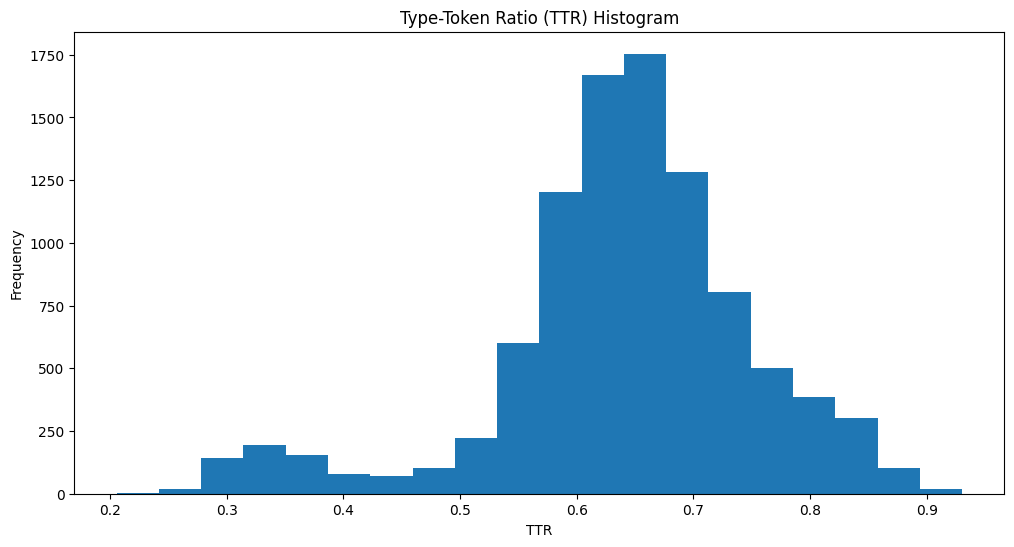

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['ttr'], bins=20)  # You can adjust the number of bins as needed
plt.title('Type-Token Ratio (TTR) Histogram')
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.show()

Most documents have a TTR around 0.6-0.7, this indicates the documents are in general not very lexically diverse. There is another smaller group of documents that have a much higher lexical diversity at around 0.3 TTR.

In [ ]:
# Add 'content length'
#df['content Length'] = df['content'].astype(str).apply(len)

# We already have content length, it is the word count column

df['num_tokens'] = df['lemmatized_content'].apply(lambda x: len(x))

# Add polarity
df['polarity'] = df['content_cleaned'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [ ]:
# Descriptive statistics of your dataframe
df.describe()

word_count          ttr   num_tokens     polarity
count  9607.000000  9607.000000  9607.000000  9607.000000
mean    748.198917     0.641015   442.062038     0.124910
std     440.948981     0.111299   250.768569     0.061657
min     187.000000     0.205761   104.000000    -0.247789
25%     416.500000     0.594441   250.000000     0.084332
50%     636.000000     0.648148   382.000000     0.120542
75%     962.000000     0.703194   567.500000     0.161656
max    2963.000000     0.930233  1724.000000     0.466667

In [ ]:
# Take a look at our new features
df.iloc[0][['num_tokens', 'polarity']]

num_tokens         246
polarity      0.067613
Name: 0, dtype: object

We also applied a simple sentiment analysis to the articles to roughly determine whether they are mainly positive or negative. The plot below shows the distribution of sentiment polarity. A positive number indicates a mainly positive sentiment, while a negative number indicates a more negative sentiment.

Text(0.5, 1.0, 'Polarity distribution')

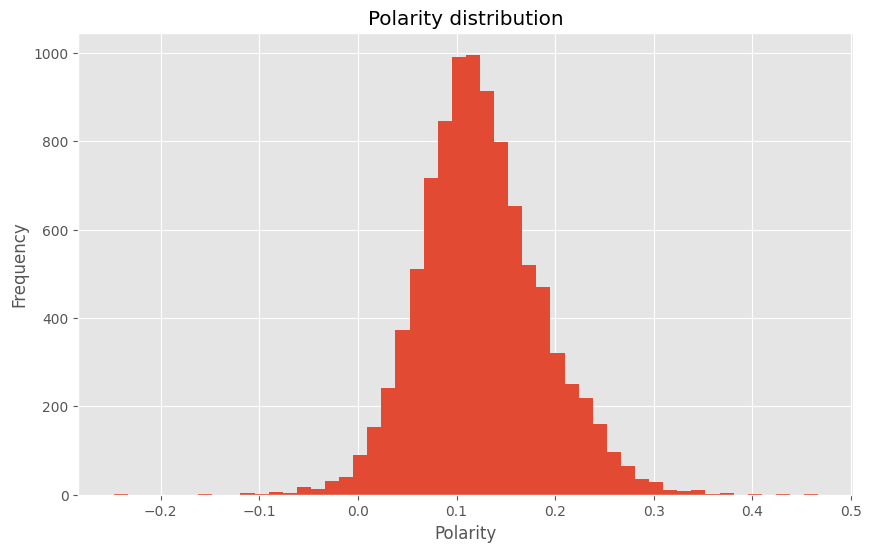

In [ ]:
# Plot the distribution of polarity sentiment score
# change plotting colors per client request
plt.style.use('ggplot')
df['polarity'].plot(kind='hist', bins=50)
plt.xlabel('Polarity')
plt.title('Polarity distribution')

We can see that in general the articles are fairly neutral, which is typical of mor objective/scientific text.

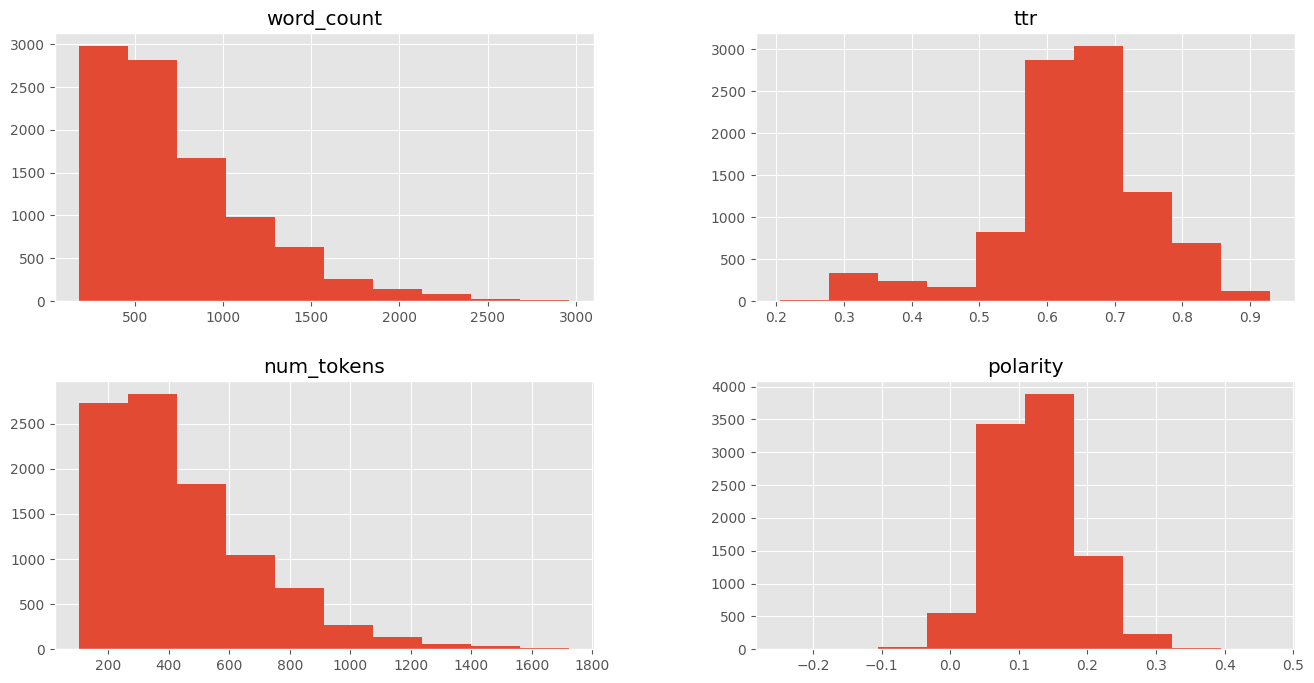

In [ ]:
df.hist(figsize=(16,8));

### Term Frequency-Inverse Document Frequency

A form of text vectorization that not only considers the frequency of a word in a document but also how important the word is in the entire corpus. It helps in giving higher weights to words that are important in a document but not as common across documents

In [ ]:
from sklearn.feature_extraction import _stop_words as sklearn_stop_words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:
# Remove more stop words just to be sure
# Grab standard English stopwords
stop_words = set(sklearn_stop_words.ENGLISH_STOP_WORDS)
# And add in some of our own ("like" is really common and doesn't tell us much)
stop_words = stop_words.union(set([
    "www", "http", "https", "br", "amazon", "href", "wa", "ha",
    "like", "just", "s", "cookie", "setting", "datum", "website", "azocleantech"
]))

In [ ]:
# Tokenize and turn into numbers
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9, # Remove any words that appear in more than 90% of our documents
    min_df=5, # Remove words that appear in fewer than 5 document
    ngram_range=(1, 1), # Only extract unigrams
    stop_words=list(stop_words), # Remove stopwords
    max_features=2500 # Grab the 2500 most common words (based on above constraints)
)
tfidf = tfidf_vectorizer.fit_transform(df['final_cleaned'])
ngrams = tfidf_vectorizer.get_feature_names_out()

In [ ]:
tfidf.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.08547375, 0.        ,
         0.        ],
        [0.        , 0.        , 0.03177916, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Create a dataframe of unigrams
ngram_df = pd.DataFrame(tfidf.todense(), columns=ngrams)
ngram_df.head()

abb  aberdeen   ability      able  abundant   ac  academic  accelerate  \
0  0.0       0.0  0.000000  0.043169       0.0  0.0       0.0         0.0   
1  0.0       0.0  0.000000  0.000000       0.0  0.0       0.0         0.0   
2  0.0       0.0  0.031779  0.000000       0.0  0.0       0.0         0.0   
3  0.0       0.0  0.000000  0.000000       0.0  0.0       0.0         0.0   
4  0.0       0.0  0.000000  0.000000       0.0  0.0       0.0         0.0   

   accelerated  accelerating  accept  access  accessed  accessible  according  \
0          0.0           0.0     0.0     0.0       0.0         0.0   0.000000   
1          0.0           0.0     0.0     0.0       0.0         0.0   0.039207   
2          0.0           0.0     0.0     0.0       0.0         0.0   0.066683   
3          0.0           0.0     0.0     0.0       0.0         0.0   0.029294   
4          0.0           0.0     0.0     0.0       0.0         0.0   0.036067   

   ...  xpev      year  yes  yesterday  yield      york  young  yoy  zach  \
0  ...   0.0  0.042201  0.0        0.0    0.0  0.000000    0.0  0.0   0.0   
1  ...   0.0  0.094773  0.0        0.0    0.0  0.000000    0.0  0.0   0.0   
2  ...   0.0  0.026865  0.0        0.0    0.0  0.000000    0.0  0.0   0.0   
3  ...   0.0  0.035405  0.0        0.0    0.0  0.000000    0.0  0.0   0.0   
4  ...   0.0  0.065387  0.0        0.0    0.0  0.433248    0.0  0.0   0.0   

   zackin  zealand      zero  zerocarbon  zeroemission      zone  
0     0.0      0.0  0.000000    0.000000           0.0  0.000000  
1     0.0      0.0  0.000000    0.085474           0.0  0.000000  
2     0.0      0.0  0.027404    0.000000           0.0  0.000000  
3     0.0      0.0  0.000000    0.000000           0.0  0.055929  
4     0.0      0.0  0.000000    0.000000           0.0  0.000000  

[5 rows x 2500 columns]

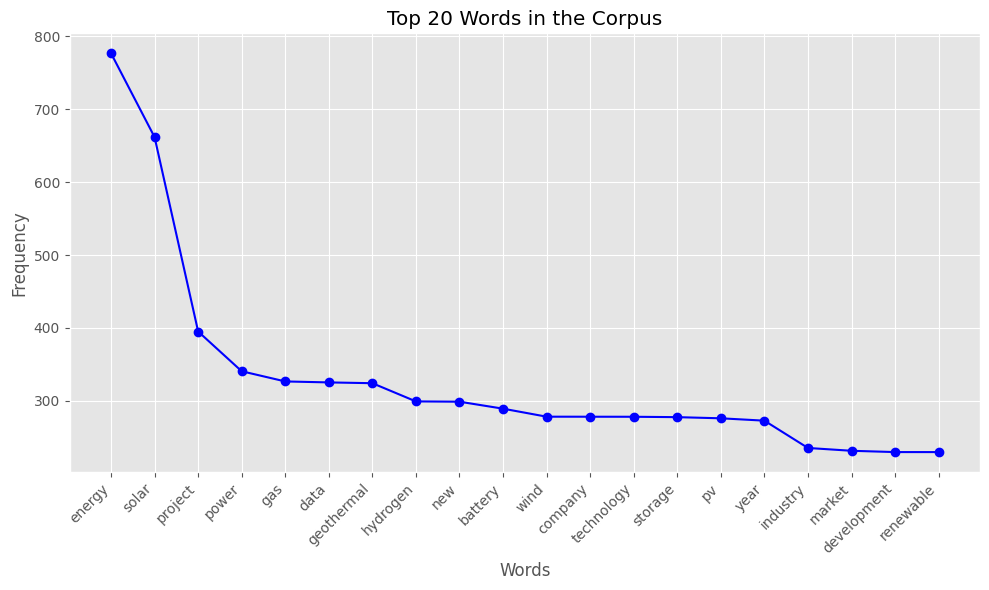

In [ ]:
# Identify the top 20 words in the corpus
top20_uni = ngram_df.sum().sort_values(ascending=False)[:20]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(top20_uni.index, top20_uni.values, marker='o', linestyle='-', color='b')
plt.title('Top 20 Words in the Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

We can see that the top 20 words differs from the frequency calculation due to the added weighting of words. Regardless, energy and solar remain the top 2 words of the corpus. Now, lets do the same calculation for bigrams.

In [ ]:
# Tokenize and turn bigrams into numbers
tfidf_vectorizer2 = TfidfVectorizer(
    max_df=0.9, # Remove any words that appear in more than 90% of our documents
    min_df=5, # Remove words that appear in fewer than 5 document
    ngram_range=(2, 2), # Only extract unigrams
    stop_words=list(stop_words), # Remove stopwords
    max_features=2500 # Grab the 2500 most common words (based on above constraints)
)
tfidf2 = tfidf_vectorizer2.fit_transform(df['final_cleaned'])
ngrams2 = tfidf_vectorizer2.get_feature_names_out()

In [ ]:
tfidf2.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.12957606, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
ngram2_df = pd.DataFrame(tfidf2.todense(), columns=ngrams2)
ngram2_df.head()

abigail ross  able provide  abu dhabi  academy science  \
0           0.0           0.0        0.0              0.0   
1           0.0           0.0        0.0              0.0   
2           0.0           0.0        0.0              0.0   
3           0.0           0.0        0.0              0.0   
4           0.0           0.0        0.0              0.0   

   accelerate development  accept consenting  access ngi  access scientific  \
0                     0.0                0.0         0.0                0.0   
1                     0.0                0.0         0.0                0.0   
2                     0.0                0.0         0.0                0.0   
3                     0.0                0.0         0.0                0.0   
4                     0.0                0.0         0.0                0.0   

   according bkr  according data  according energy  according international  \
0            0.0             0.0               0.0                      0.0   
1            0.0             0.0               0.0                      0.0   
2            0.0             0.0               0.0                      0.0   
3            0.0             0.0               0.0                      0.0   
4            0.0             0.0               0.0                      0.0   

   according latest  according medium  according new  ...  year time  \
0               0.0               0.0            0.0  ...        0.0   
1               0.0               0.0            0.0  ...        0.0   
2               0.0               0.0            0.0  ...        0.0   
3               0.0               0.0            0.0  ...        0.0   
4               0.0               0.0            0.0  ...        0.0   

   year year  yearago period  yearearlier period  york city  york state  \
0        0.0             0.0                 0.0   0.000000    0.000000   
1        0.0             0.0                 0.0   0.000000    0.000000   
2        0.0             0.0                 0.0   0.000000    0.000000   
3        0.0             0.0                 0.0   0.000000    0.000000   
4        0.0             0.0                 0.0   0.586451    0.116477   

   youtube advertise  zach longterm  zach recognized  zach tryin  \
0                0.0            0.0              0.0         0.0   
1                0.0            0.0              0.0         0.0   
2                0.0            0.0              0.0         0.0   
3                0.0            0.0              0.0         0.0   
4                0.0            0.0              0.0         0.0   

   zackin publication  zero carbon  zero emission  zero goal  zero target  
0                 0.0          0.0            0.0        0.0          0.0  
1                 0.0          0.0            0.0        0.0          0.0  
2                 0.0          0.0            0.0        0.0          0.0  
3                 0.0          0.0            0.0        0.0          0.0  
4                 0.0          0.0            0.0        0.0          0.0  

[5 rows x 2500 columns]

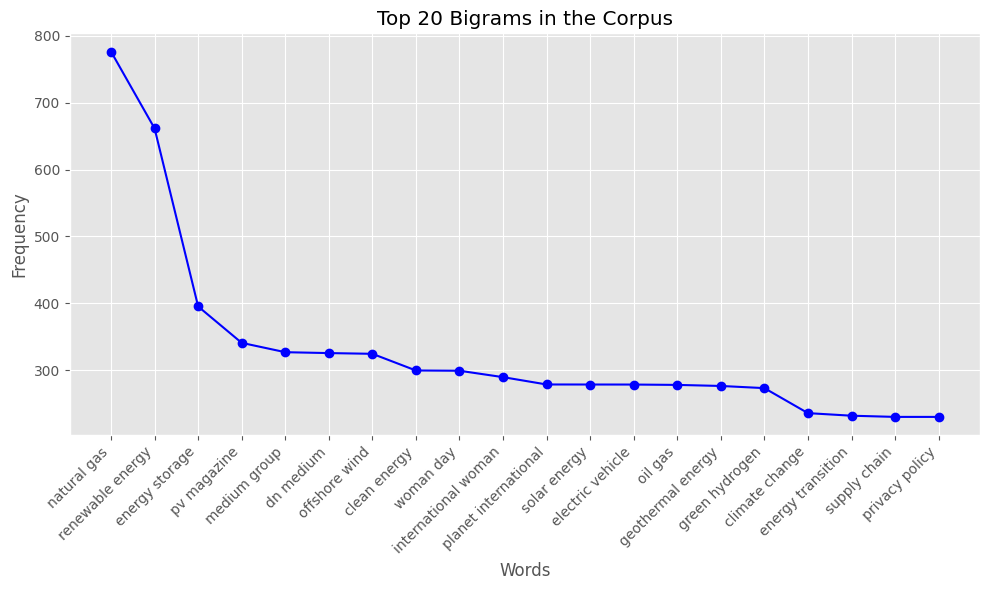

In [ ]:
top20_bi = ngram2_df.sum().sort_values(ascending=False)[:20]

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(top20_bi.index, top20_uni.values, marker='o', linestyle='-', color='b')
plt.title('Top 20 Bigrams in the Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Word2Vec

Word2Vec is primarily used for word embeddings, representing words as continuous vector spaces. It captures semantic relationships between words based on their context within a given corpus. We will use this to explore the semantic relationships between words.

In [ ]:
# Load packages
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

In [ ]:
# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

w2vmodel = Word2Vec(sentences=df['lemmatized_content'], vector_size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

In [ ]:
# Inspect most similar words to, e.g., carbon, gas, energy, solar
w2vmodel.wv.most_similar('energy', topn=5)

[('electricity', 0.5974745154380798),
 ('power', 0.5448493361473083),
 ('complement', 0.5255680084228516),
 ('intermittent', 0.45583146810531616),
 ('energybased', 0.4377177953720093)]

Electricity and power show up as semantically similar words to energy. This makes sense but complement, intermittent and decentralized do not seem to be related. This could indicate the downfalls of a limited vocabulary in Word2vec. Lets analyze the similarity between two common words in the corpus.

In [ ]:
# Compute similarity between two words in the vocabulary by invoking the similarity() function and passing in the relevant words
w2vmodel.wv.similarity('energy', 'renewable')

0.22795038

The model could be improved based on the low similarity score between electricity and renewable. This was shown to be a very common bigram according to TF-IDF.

In [ ]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in w2vmodel.wv.most_similar([search_term], topn=5)]
    for search_term in ['energy', 'fuel','gas', 'carbon', 'oil', 'wind']
}
similar_words

{'energy': ['electricity',
  'power',
  'complement',
  'intermittent',
  'energybased'],
 'fuel': ['fuelpowered', 'fuelbased', 'fuelfired', 'fuelderived', 'fracked'],
 'gas': ['crude', 'gasrelated', 'gasfired', 'horticulture', 'nw'],
 'carbon': ['co', 'directair', 'zincmanganese', 'ghg', 'imagination'],
 'oil': ['flared', 'natural', 'silane', 'petroleum', 'russian'],
 'wind': ['aurelia', 'solarduck', 'tidal', 'aquafarming', 'windfarms']}

Fuel relates to all of its derivates such as fuel-based, fuel-powered, etc. While true, this does not reveal new and meaningful relationships in the corpus.

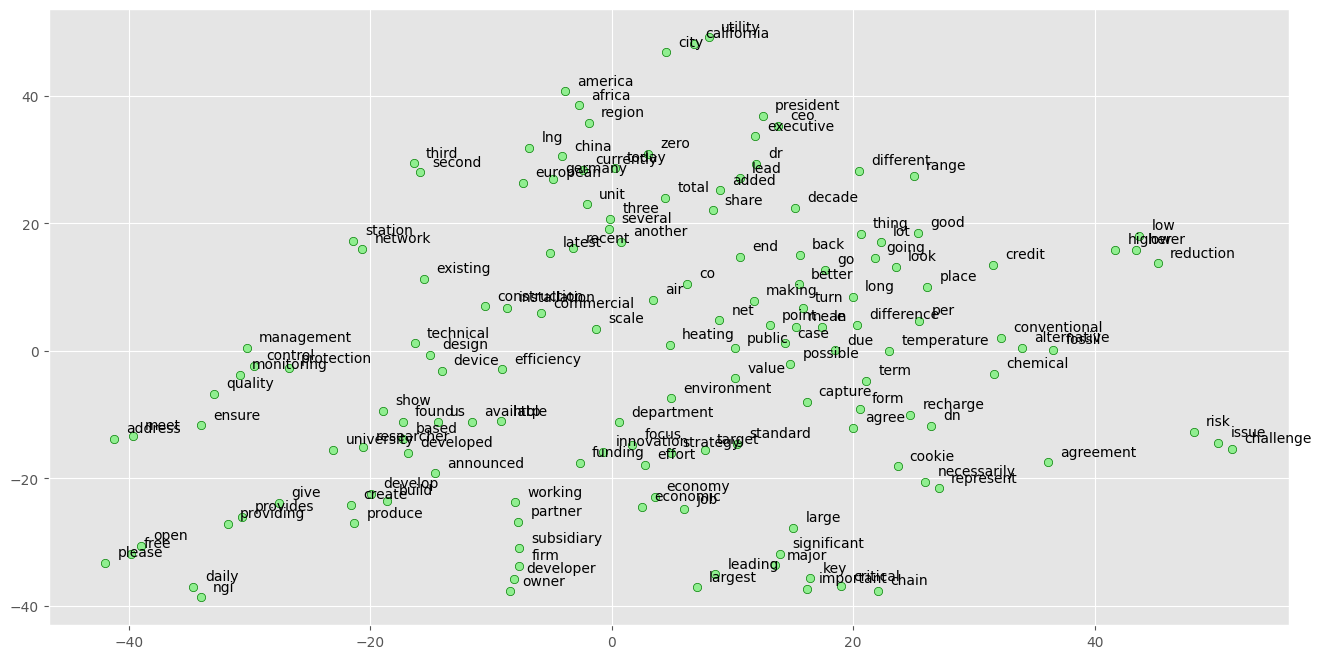

In [ ]:
# Plot a sample of vocublary showing semantic similarity
from sklearn.manifold import TSNE

words = w2vmodel.wv.index_to_key[200:350]      ## get the word forms of voculary sample
wvs = w2vmodel.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(16, 8))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

This plot provides insight on the semantic similarity between words in the corpus. However, the table is very widely dispersed and could provide more insight if we focused on a single token. We will use the most freguently used token "energy" in the plot below.

In [ ]:
# Select topn similar words to a given token

def display_closestwords_tsnescatterplot(model, word, size):

    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word, topn=75)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(15, 8))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

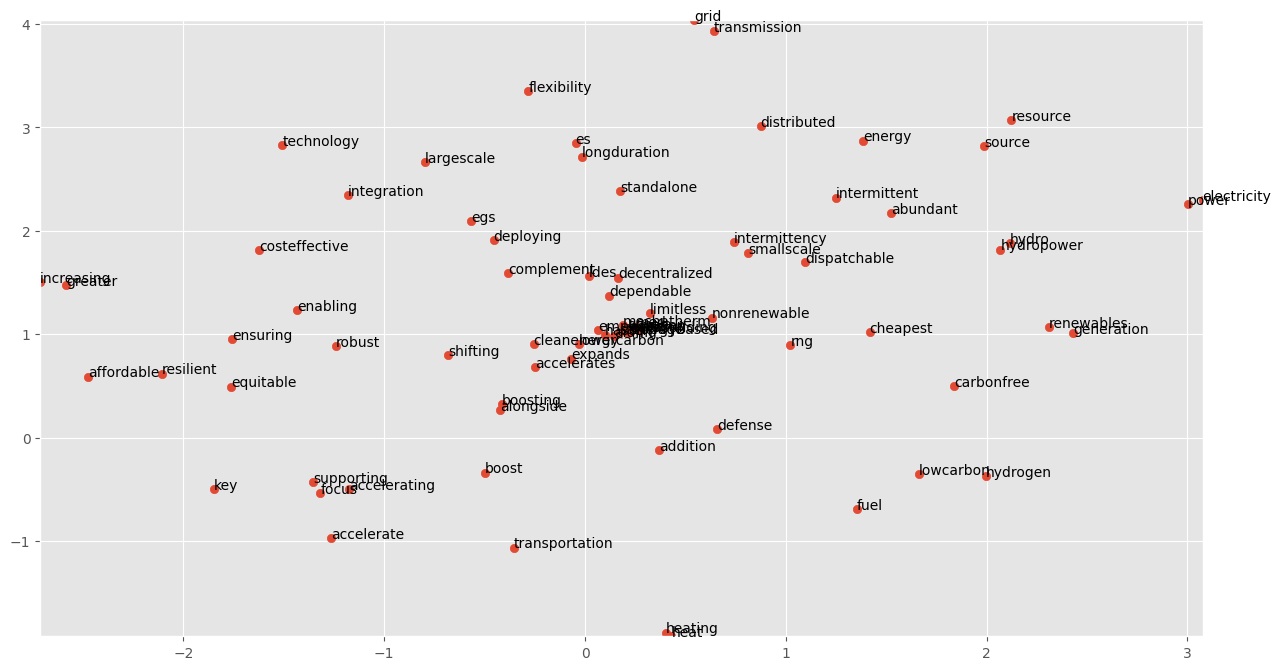

In [ ]:
# Inspect the most similar (play with topn if you like) and change the input token 'red' to other tokens
display_closestwords_tsnescatterplot(w2vmodel, 'energy',100)

The closest synonyms surround the term "energy" in the upper right section of the plot. Verbs applied to the term are located in the center middle and lower sections of the plot (i.e. decentralized, boosting, advancing, etc) while descriptive adjectives are on the right (i.e. lowcost, flexible, robust, etc). Nouns are more widely dispersed throughout the chart but higher concentrations can be seen on the edges of the plot (i.e. source, hydrogen, heat, elecricity, technology).

## Top2Vec Modelling

This model will use Doc2Vec to create jointly embedded document and word vectors.

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.doc2vec import TaggedDocument
from sklearn import preprocessing

In [ ]:
# !pip uninstall protobuf python3-protobuf
!pip install --upgrade pip
!pip install --upgrade protobuf

  Using cached protobuf-4.25.1-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached protobuf-4.25.1-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.1 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.1 which is incompatible.


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-hub
!pip install --upgrade tensorflow-text

  Using cached protobuf-4.23.4-cp37-abi3-manylinux2014_x86_64.whl.metadata (540 bytes)
Using cached protobuf-4.23.4-cp37-abi3-manylinux2014_x86_64.whl (304 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.1
    Uninstalling protobuf-4.25.1:
      Successfully uninstalled protobuf-4.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.23.4 which is incompatible.


In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

In [ ]:
# Install packages
import tensorflow
from top2vec import Top2Vec

In [ ]:
# Create a list of documents
documents = df['final_cleaned'].tolist()
# Initialize Top2Vec model
model = Top2Vec(documents, speed="learn", workers=8)

2023-11-27 19:28:35,611 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

2023-11-27 19:28:49,999 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-11-27 19:28:51,778 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-27 19:31:52,099 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-27 19:32:04,210 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-27 19:32:04,514 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
# Save the model
model.save("top2vec_model_1")
#model = Top2Vec.load("top2vec_model_1")

In [ ]:
# Create a list of documents
documents = df['final_cleaned'].tolist()

# dimension reduction parameters
umap_args = {'n_neighbors': 10,
             'n_components': 5,
             'metric': 'cosine',
             "random_state": 42}
# clustering algorithm parameters to find dense areas of documents
hdbscan_args = {'min_cluster_size': 10,
                'min_samples':5,
                'metric': 'euclidean',
                'cluster_selection_method': 'eom'}
model = Top2Vec(documents= documents, speed='learn', workers=8, min_count = 0, umap_args = umap_args, hdbscan_args = hdbscan_args)

2023-11-27 19:46:51,538 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

2023-11-27 19:47:05,380 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2023-11-27 19:47:07,109 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-27 19:50:36,871 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

2023-11-27 19:50:58,882 - top2vec - INFO - Finding dense areas of documents


106

In [ ]:
# Get topics
topics = model.get_topics()

In [ ]:
# Get total number of topics discovered
model.get_num_topics()

106

106 topics is too large to properly analyze. We can reduce the number of topics with topic reduction.

In [146]:
model.hierarchical_topic_reduction(num_topics=10)

[[18, 61, 45, 95, 90, 25, 43, 47, 76, 85, 97, 13, 49, 103, 32, 1],
 [41, 100, 104, 91, 53, 65, 66, 74, 0],
 [5, 17, 59, 60, 67, 96, 89, 92, 26, 7],
 [23, 34, 48, 55, 56, 6, 16, 71, 15, 77, 8],
 [12, 38, 21, 30, 2],
 [27, 75, 93, 11, 86, 39, 88, 101, 14, 99, 51, 35, 84, 79, 63, 98, 52],
 [22, 73, 69, 105, 9, 44, 20, 31, 68, 29],
 [28, 102, 64, 81, 82, 78, 24, 58, 80, 46, 94, 70, 36, 19, 62, 50, 10],
 [42, 54, 57, 33, 87, 40, 37, 83, 72, 4],
 [3]]

In [ ]:
# This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
topic_sizes, topic_nums = model.get_topic_sizes(reduced = True)
for topic_size, topic_num in zip(topic_sizes[::], topic_nums[::]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 1431 documents.
Topic Num 1 has 1204 documents.
Topic Num 2 has 1082 documents.
Topic Num 3 has 1018 documents.
Topic Num 4 has 915 documents.
Topic Num 5 has 903 documents.
Topic Num 6 has 900 documents.
Topic Num 7 has 785 documents.
Topic Num 8 has 711 documents.
Topic Num 9 has 658 documents.


In [ ]:
# # Creating a dataframe with topic numbers and topic words
# Get the topic numbers and words and scores for a specific topic
topic_sizes, topic_nums = model.get_topic_sizes(reduced = True)
topic_words, word_scores, topic_num = model.get_topics(len(topic_nums))

# Create an empty list to store the results
topics_data = []

# Iterate over topics
for i in range(len(topic_nums)):
    # Get words, word scores, and topic number for the current topic
    current_topic_words, current_word_scores, current_topic_num = model.get_topics()
    # Append the information for the current topic to the list
    # Words scores were excluded from the data frame because it did not add value to the analysis
    topics_data.append({'topic_nums': current_topic_num[i], 'topic_sizes': topic_sizes[i], 'topic_words': current_topic_words[i]})

# Create a DataFrame from the list of dictionaries
topics_df = pd.DataFrame(topics_data)

# Display the results DataFrame
topics_df

topic_nums  topic_sizes  \
0           0         1431   
1           1         1204   
2           2         1082   
3           3         1018   
4           4          915   
5           5          903   
6           6          900   
7           7          785   
8           8          711   
9           9          658   

                                                                                           topic_words  
0  [solarenergie, solarenergy, solar, solarpower, solarpowered, solarplus, solargenerated, solarwat...  
1  [umwelttechnik, ecoengineering, ecoenergy, ecotech, econergy, ecojet, ecopeace, ecobusiness, eco...  
2  [solarenergie, solargenerated, solarenergy, solarstorageev, solarbased, solarpowered, solarsourc...  
3  [geothermal, geotermia, geoenergie, geothermalir, geoenergies, geotermi, geothermally, geoenergy...  
4  [solarenergie, solar, solarenergy, solarpowered, solarpower, solarplus, solargenerated, solarfoc...  
5  [hydrogenfuel, energyhydrogen, hydrogenfueled, energywater, hydrogenfueling, hydrogenpowered, gr...  
6  [gasexporting, gaspowered, naturalgas, oilandgas, gas, geoenergie, gaswill, gassaving, gassolar,...  
7  [solarenergie, windenergy, ecoenergy, renewableenergy, solarenergy, energygov, geoenergie, doior...  
8  [offshorewind, windenergy, viento, wind, windgenerated, offshore, vento, geoenergie, oceanwind, ...  
9  [carbonemissions, climatecarbon, carbonemission, carbonsaving, carbonconsuming, carbonfueled, ca...

It is clear from looking at the topic words that there are multiple topics with similar themes surrounding solar energy. We can try to further consildate the topics to better represent the corpus.

In [148]:
model.hierarchical_topic_reduction(num_topics=8)

[[42, 54, 57, 33, 87, 40, 37, 83, 72, 4, 41, 100, 104, 91, 53, 65, 66, 74, 0],
 [18, 61, 45, 95, 90, 25, 43, 47, 76, 85, 97, 13, 49, 103, 32, 1],
 [3, 5, 17, 59, 60, 67, 96, 89, 92, 26, 7],
 [22, 73, 69, 105, 9, 44, 20, 31, 68, 29],
 [23, 34, 48, 55, 56, 6, 16, 71, 15, 77, 8],
 [27, 75, 93, 11, 86, 39, 88, 101, 14, 99, 51, 35, 84, 79, 63, 98, 52],
 [28, 102, 64, 81, 82, 78, 24, 58, 80, 46, 94, 70, 36, 19, 62, 50, 10],
 [12, 38, 21, 30, 2]]

In [149]:
# This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
topic_sizes, topic_nums = model.get_topic_sizes(reduced = True)
for topic_size, topic_num in zip(topic_sizes[::], topic_nums[::]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 1633 documents.
Topic Num 1 has 1492 documents.
Topic Num 2 has 1417 documents.
Topic Num 3 has 1088 documents.
Topic Num 4 has 1065 documents.
Topic Num 5 has 998 documents.
Topic Num 6 has 960 documents.
Topic Num 7 has 954 documents.


In [150]:
# # Creating a dataframe with topic numbers and topic words
# Get the topic numbers and words and scores for a specific topic
topic_sizes, topic_nums = model.get_topic_sizes(reduced = True)
topic_words, word_scores, topic_num = model.get_topics(len(topic_nums))

# Create an empty list to store the results
topics_data = []

# Iterate over topics
for i in range(len(topic_nums)):
    # Get words, word scores, and topic number for the current topic
    current_topic_words, current_word_scores, current_topic_num = model.get_topics()
    # Append the information for the current topic to the list
    # Words scores were excluded from the data frame because it did not add value to the analysis
    topics_data.append({'topic_nums': current_topic_num[i], 'topic_sizes': topic_sizes[i], 'topic_words': current_topic_words[i]})

# Create a DataFrame from the list of dictionaries
topics_df = pd.DataFrame(topics_data)

# Display the results DataFrame
topics_df

topic_nums  topic_sizes  \
0           0         1633   
1           1         1492   
2           2         1417   
3           3         1088   
4           4         1065   
5           5          998   
6           6          960   
7           7          954   

                                                                                           topic_words  
0  [solarenergie, solarenergy, solar, solarpower, solarpowered, solarplus, solargenerated, solarwat...  
1  [umwelttechnik, ecoengineering, ecoenergy, ecotech, econergy, ecojet, ecopeace, ecobusiness, eco...  
2  [solarenergie, solargenerated, solarenergy, solarstorageev, solarbased, solarpowered, solarsourc...  
3  [geothermal, geotermia, geoenergie, geothermalir, geoenergies, geotermi, geothermally, geoenergy...  
4  [solarenergie, solar, solarenergy, solarpowered, solarpower, solarplus, solargenerated, solarfoc...  
5  [hydrogenfuel, energyhydrogen, hydrogenfueled, energywater, hydrogenfueling, hydrogenpowered, gr...  
6  [gasexporting, gaspowered, naturalgas, oilandgas, gas, geoenergie, gaswill, gassaving, gassolar,...  
7  [solarenergie, windenergy, ecoenergy, renewableenergy, solarenergy, energygov, geoenergie, doior...

In [151]:
# # Creating another dataframe with documents assigned to the topics and document scores
# Get the topic sizes and topic numbers
topic_sizes, topic_nums = model.get_topic_sizes(reduced = True)

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['topic', 'document_ids','document_scores'])

# Iterate over topics
for i in range(len(topic_sizes)):
    # Get documents, document scores, and document IDs for the current topic
    documents, document_scores, document_ids = model.search_documents_by_topic(reduced = True, topic_num=i, num_docs=topic_sizes[i])

    # Create a DataFrame for the current topic
    topic_df = pd.DataFrame({'topic': i, 'document_ids': document_ids, 'document_scores': document_scores})

    # Append the DataFrame for the current topic to the results DataFrame
    results_df = pd.concat([results_df, topic_df], ignore_index=True)

# Display the results DataFrame
results_df

topic document_ids  document_scores
0        0         4899         0.898166
1        0         5594         0.896928
2        0         9018         0.894070
3        0         9015         0.890197
4        0         9597         0.888487
...    ...          ...              ...
9602     7         2544         0.412317
9603     7         2610         0.411285
9604     7         2523         0.359362
9605     7         6730         0.358645
9606     7         2595         0.315233

[9607 rows x 3 columns]

The document scores are quite low for some of the documents. This could indicate that outliers exist in the data. Lets view the word clouds for each topic to get another view of the data.

<Figure size 200x200 with 0 Axes>

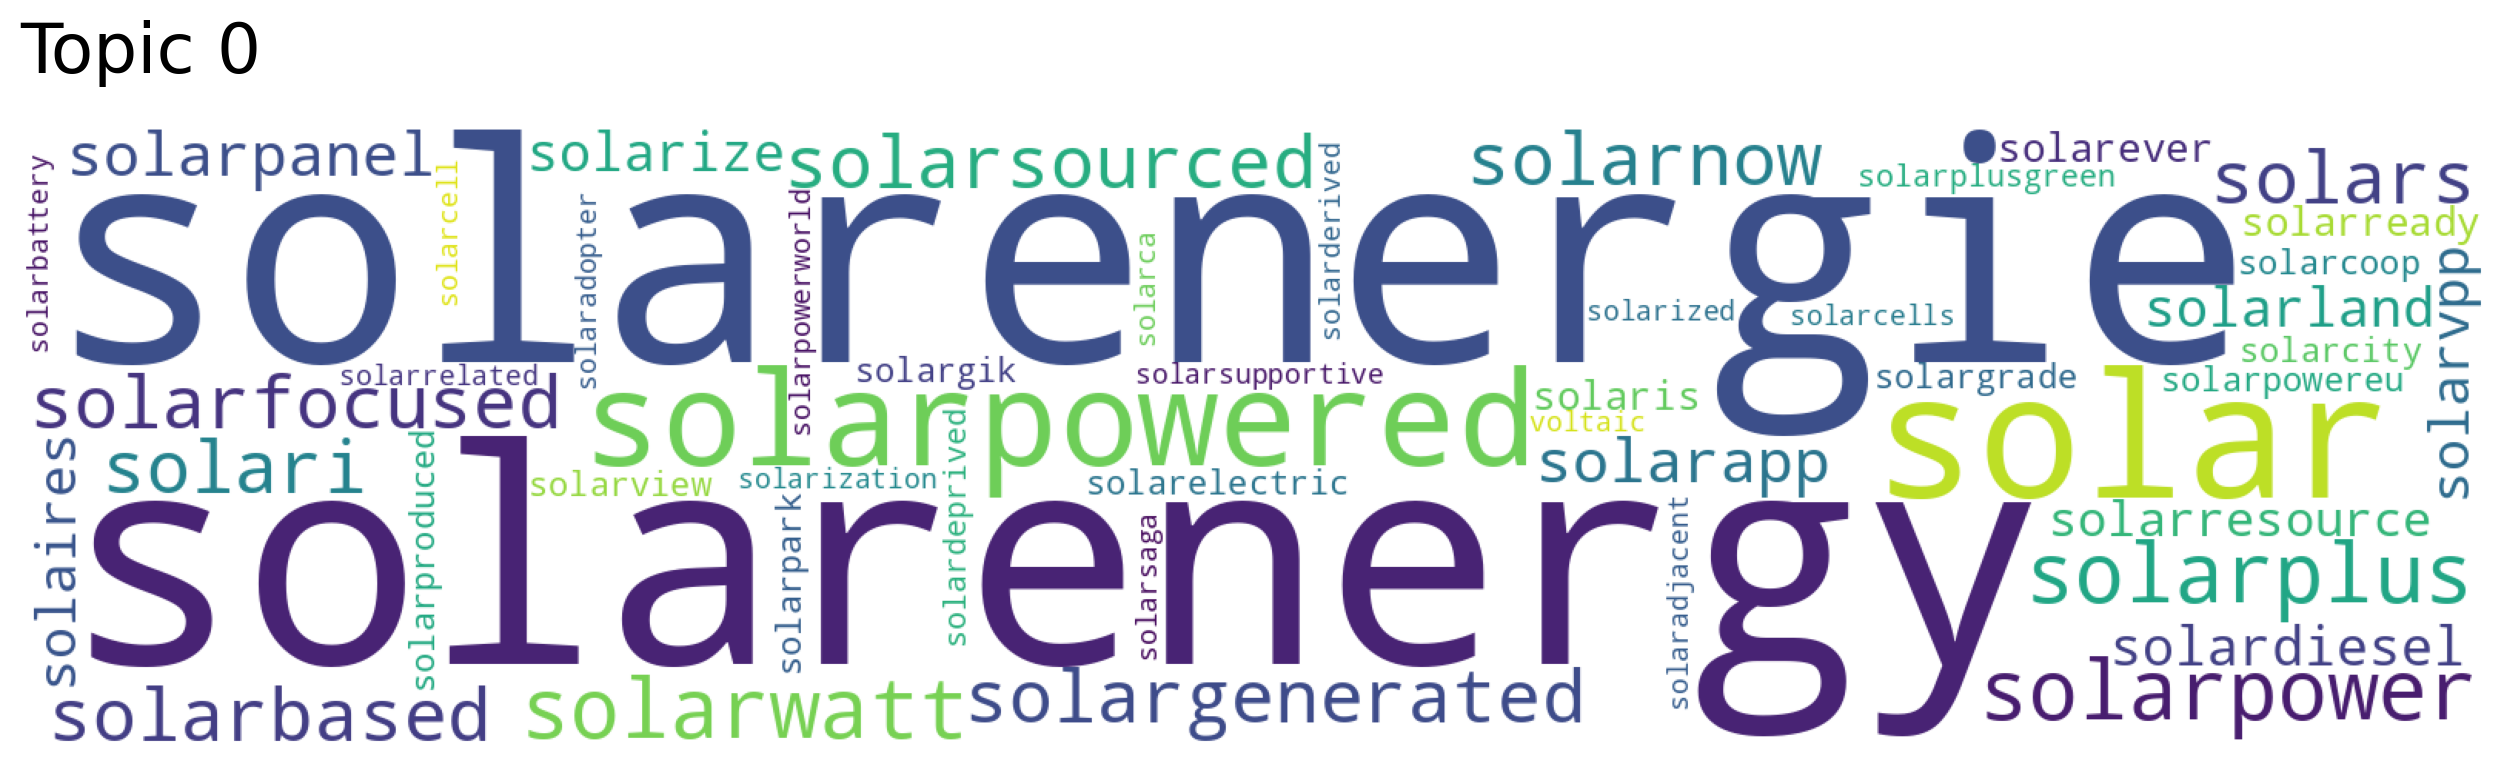

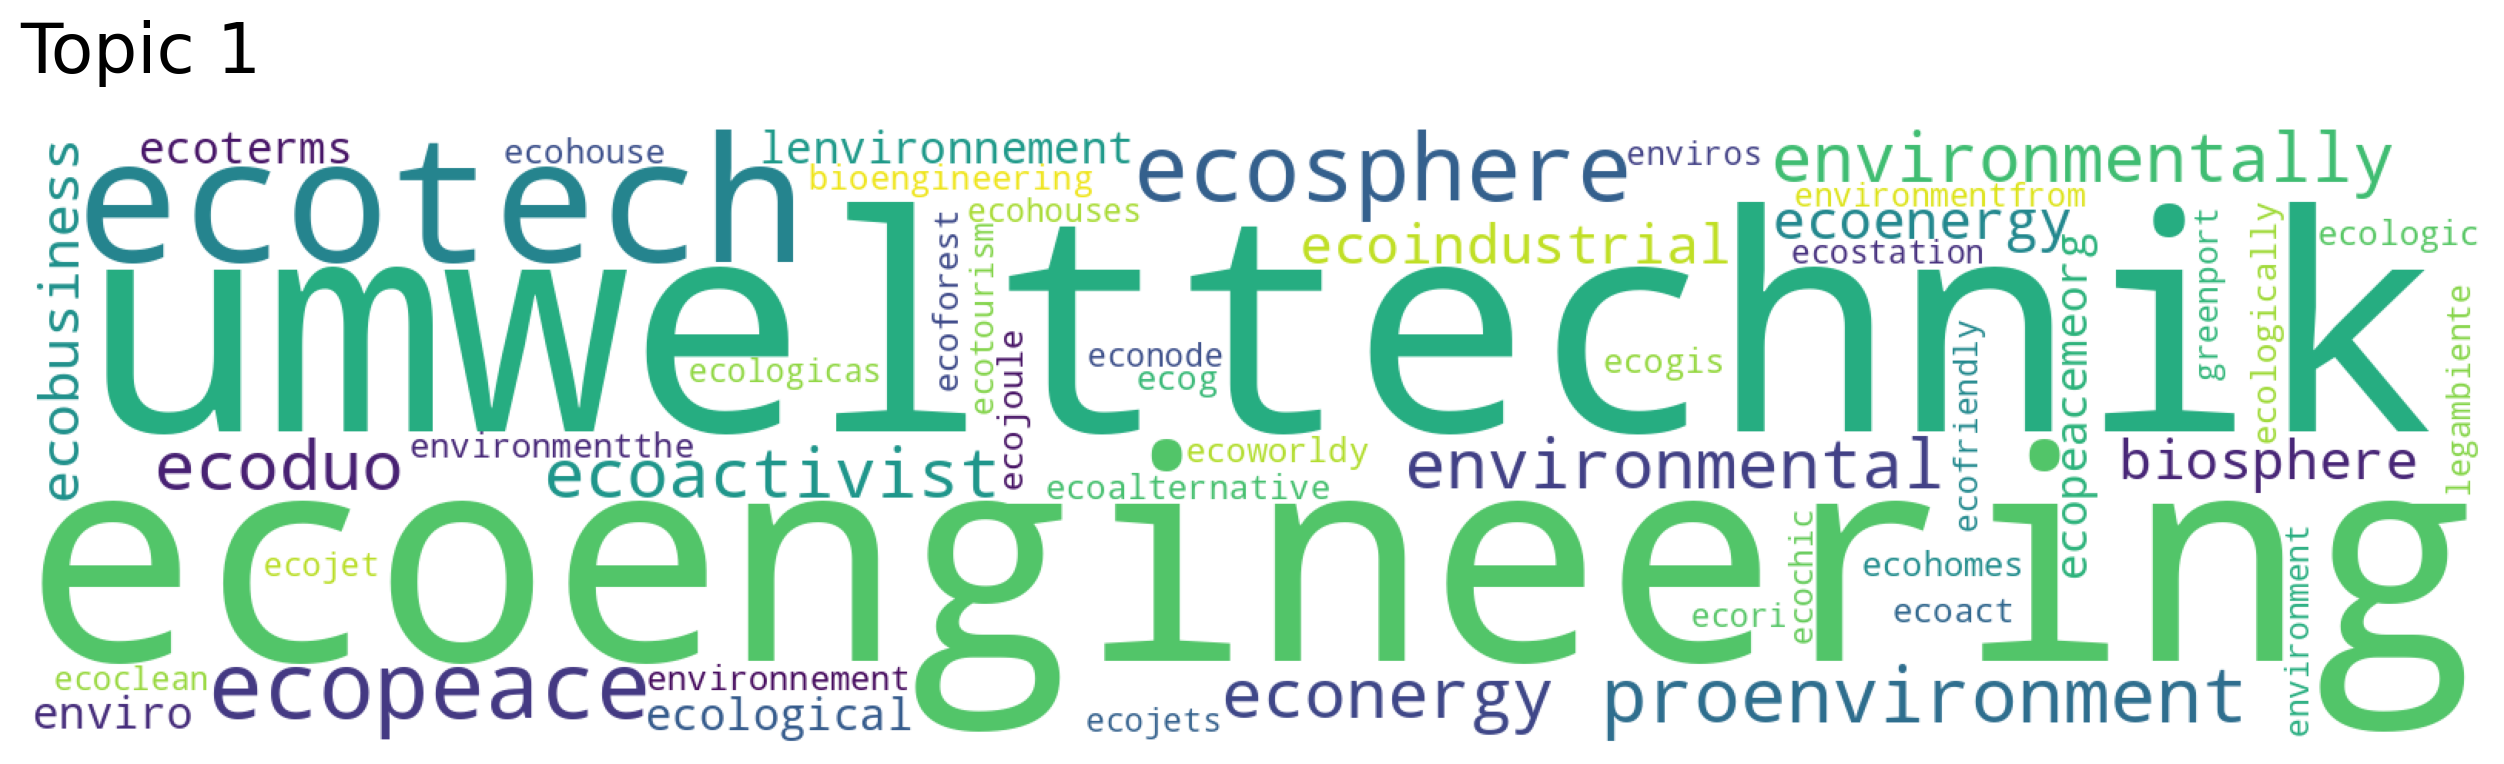

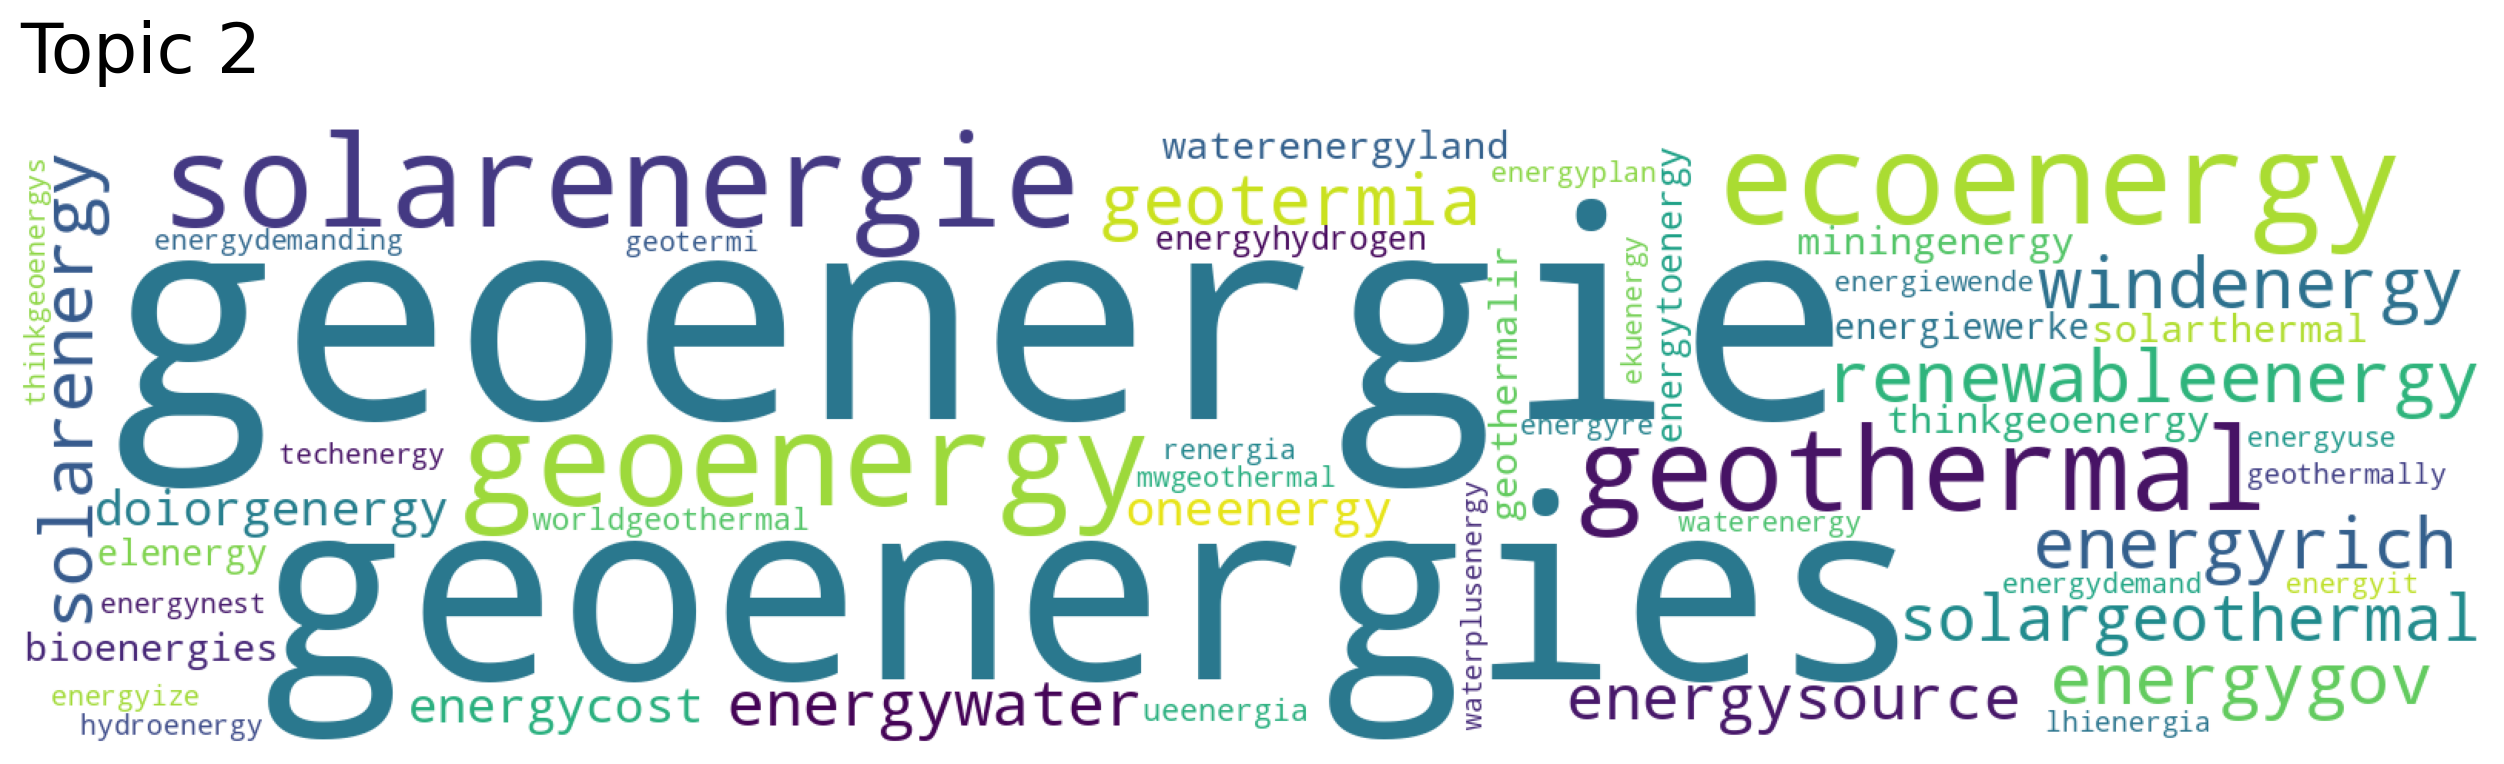

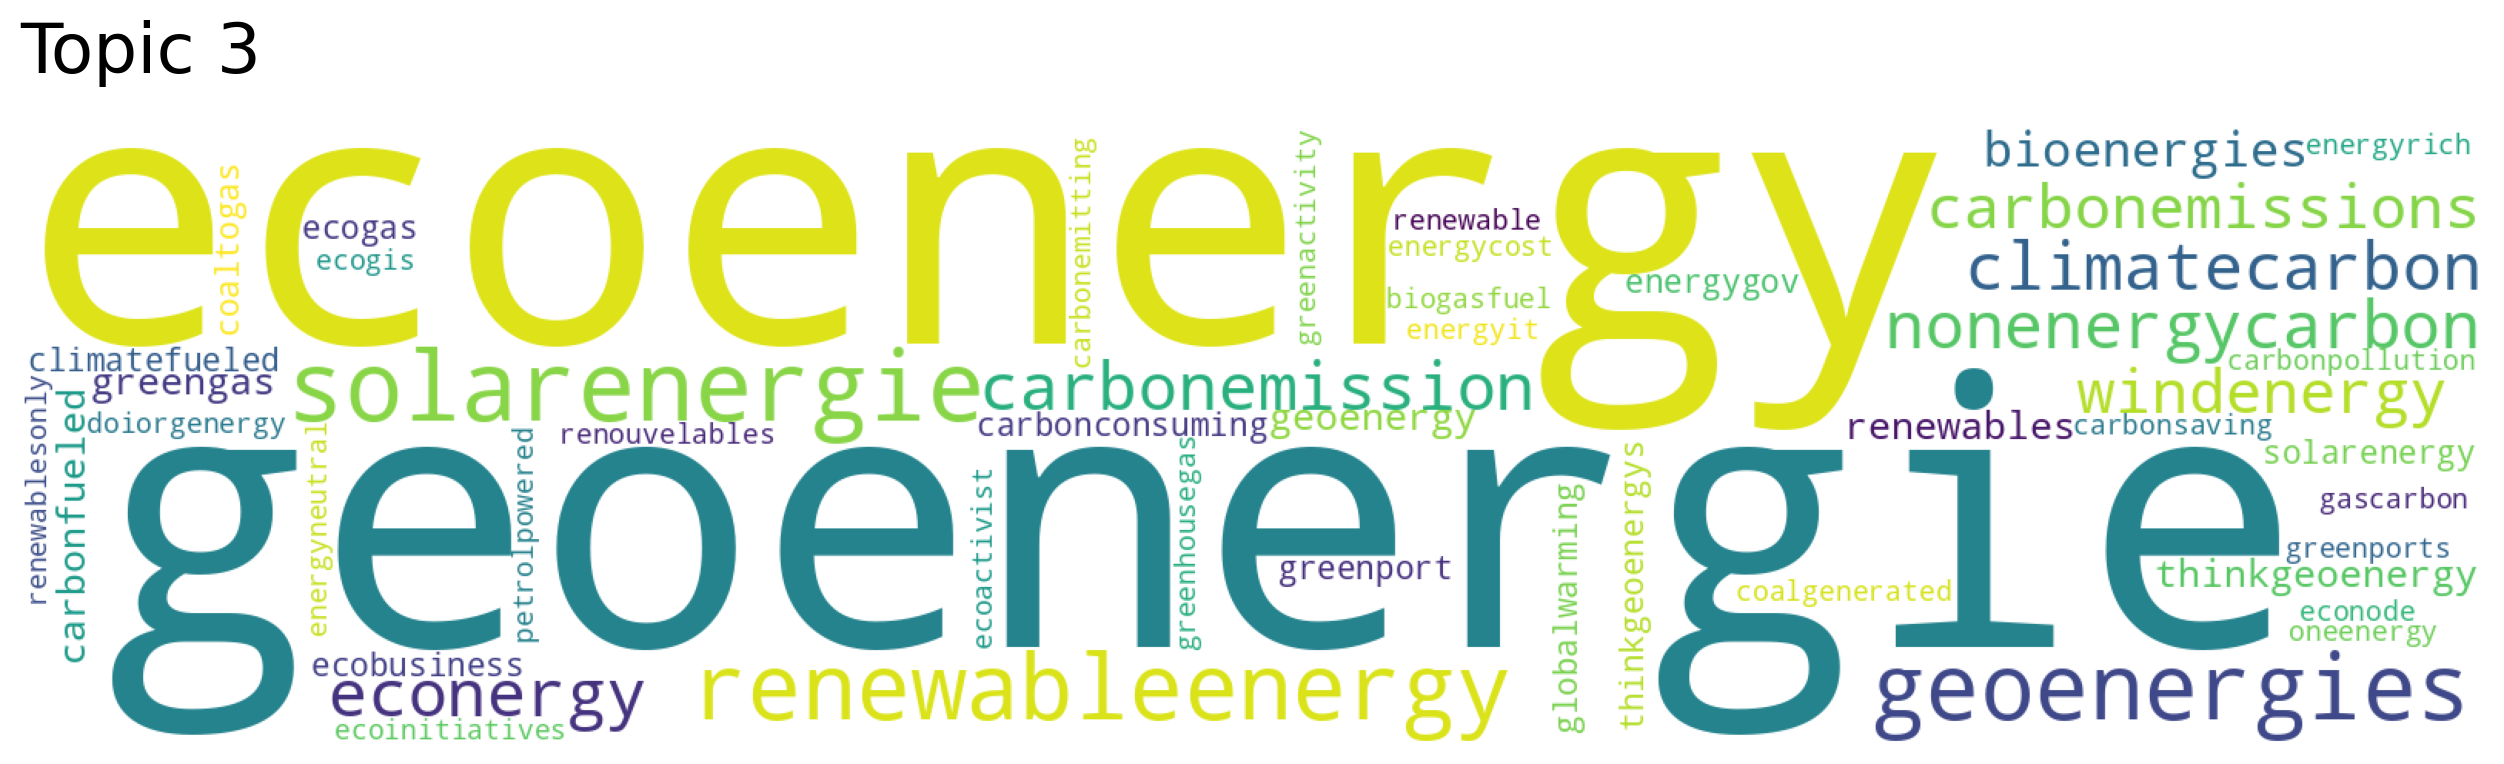

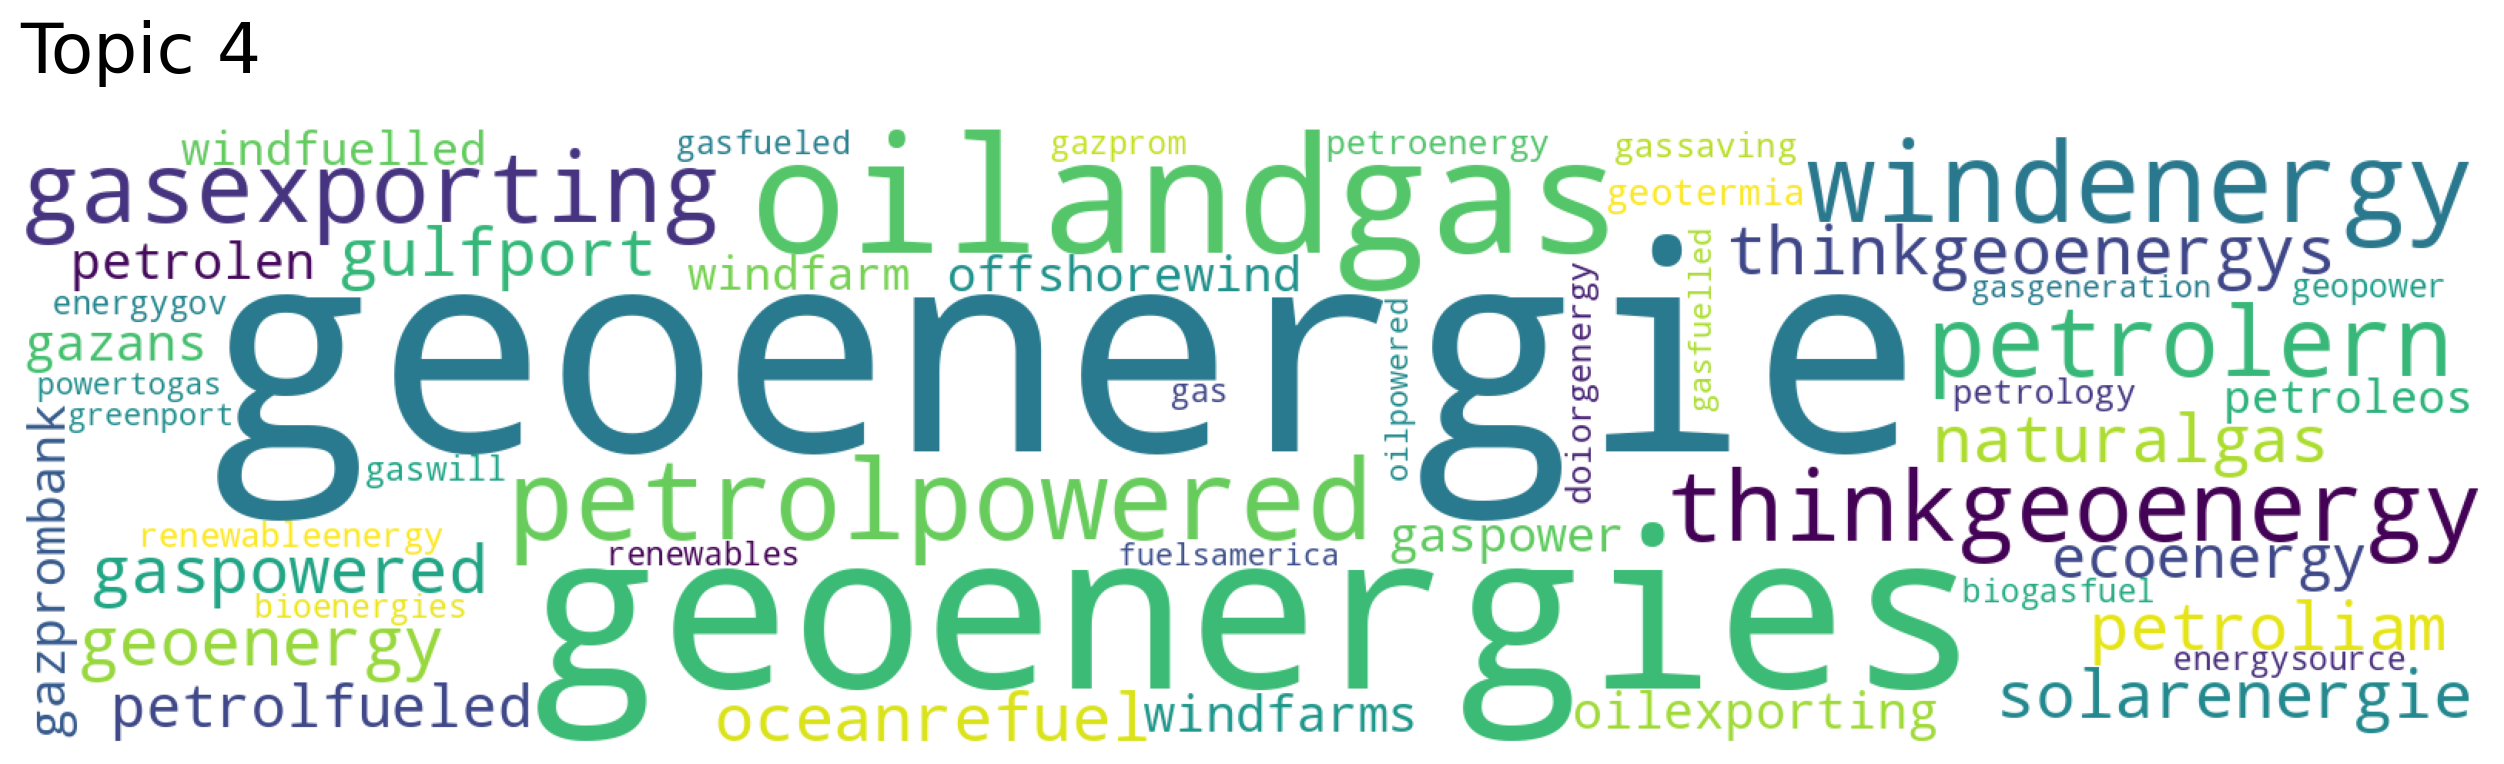

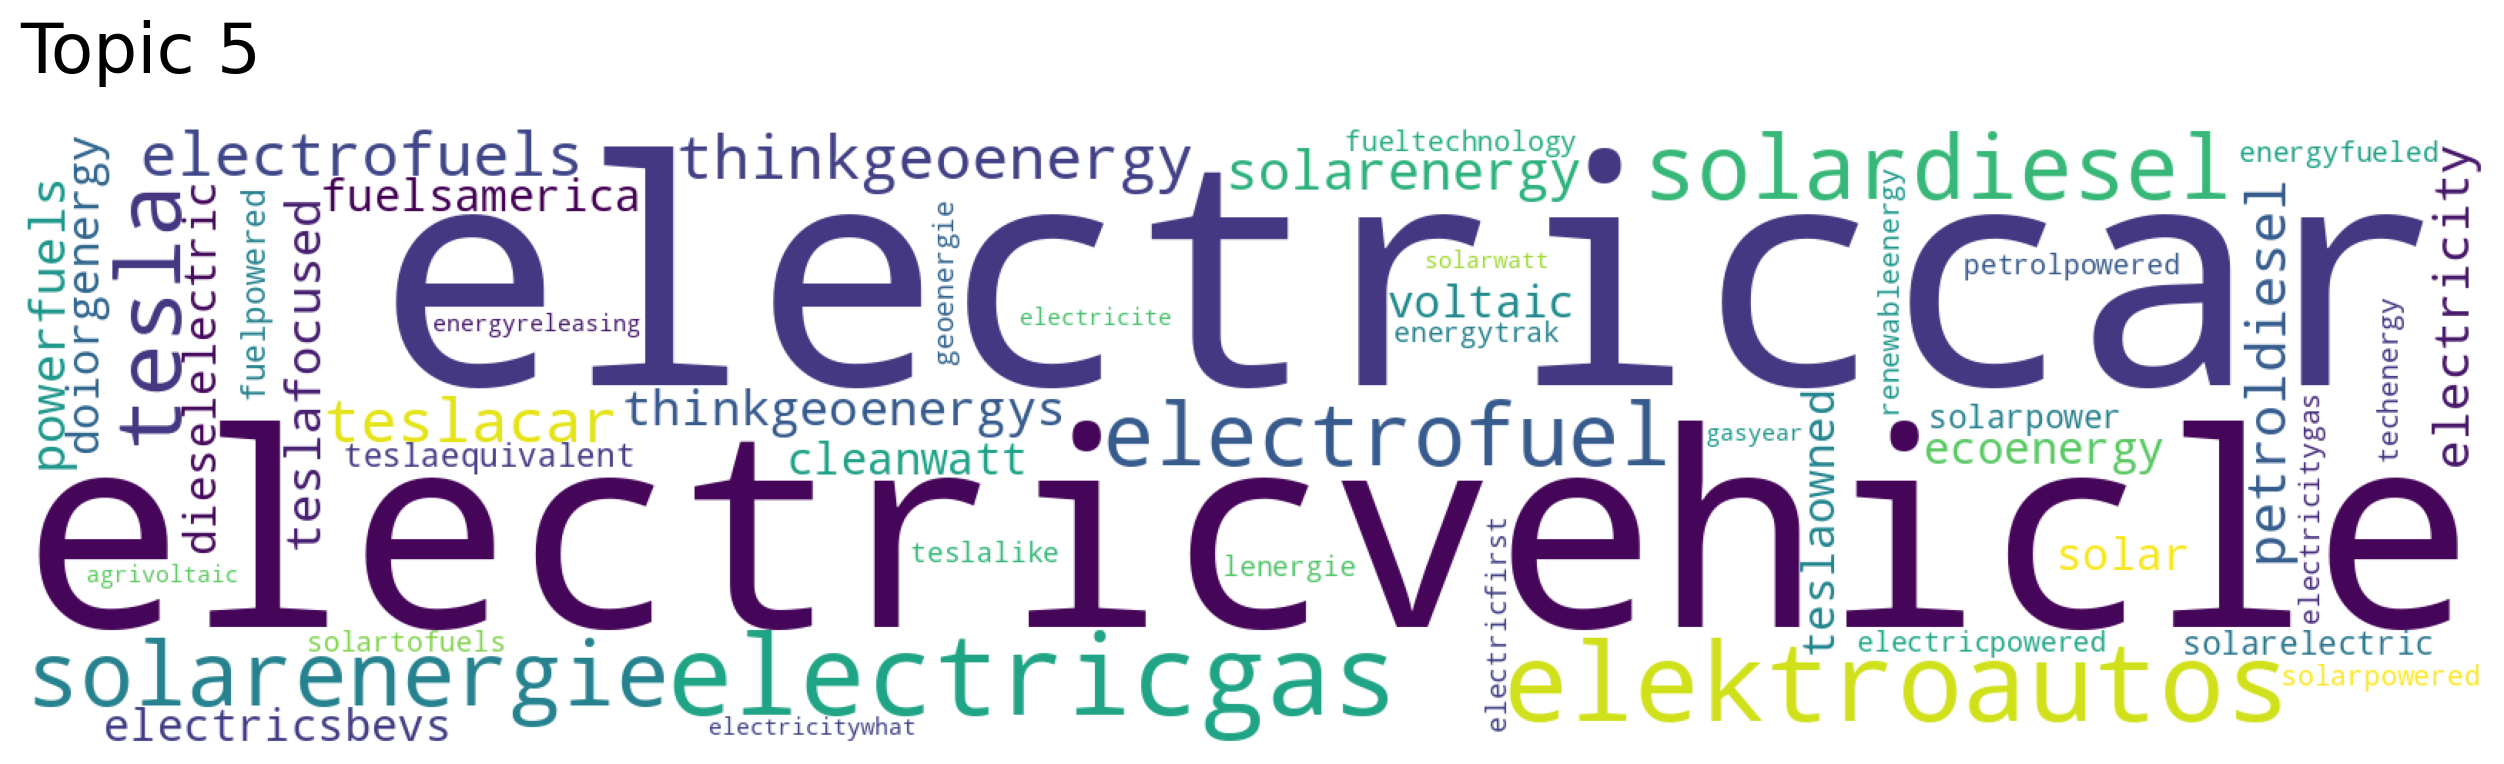

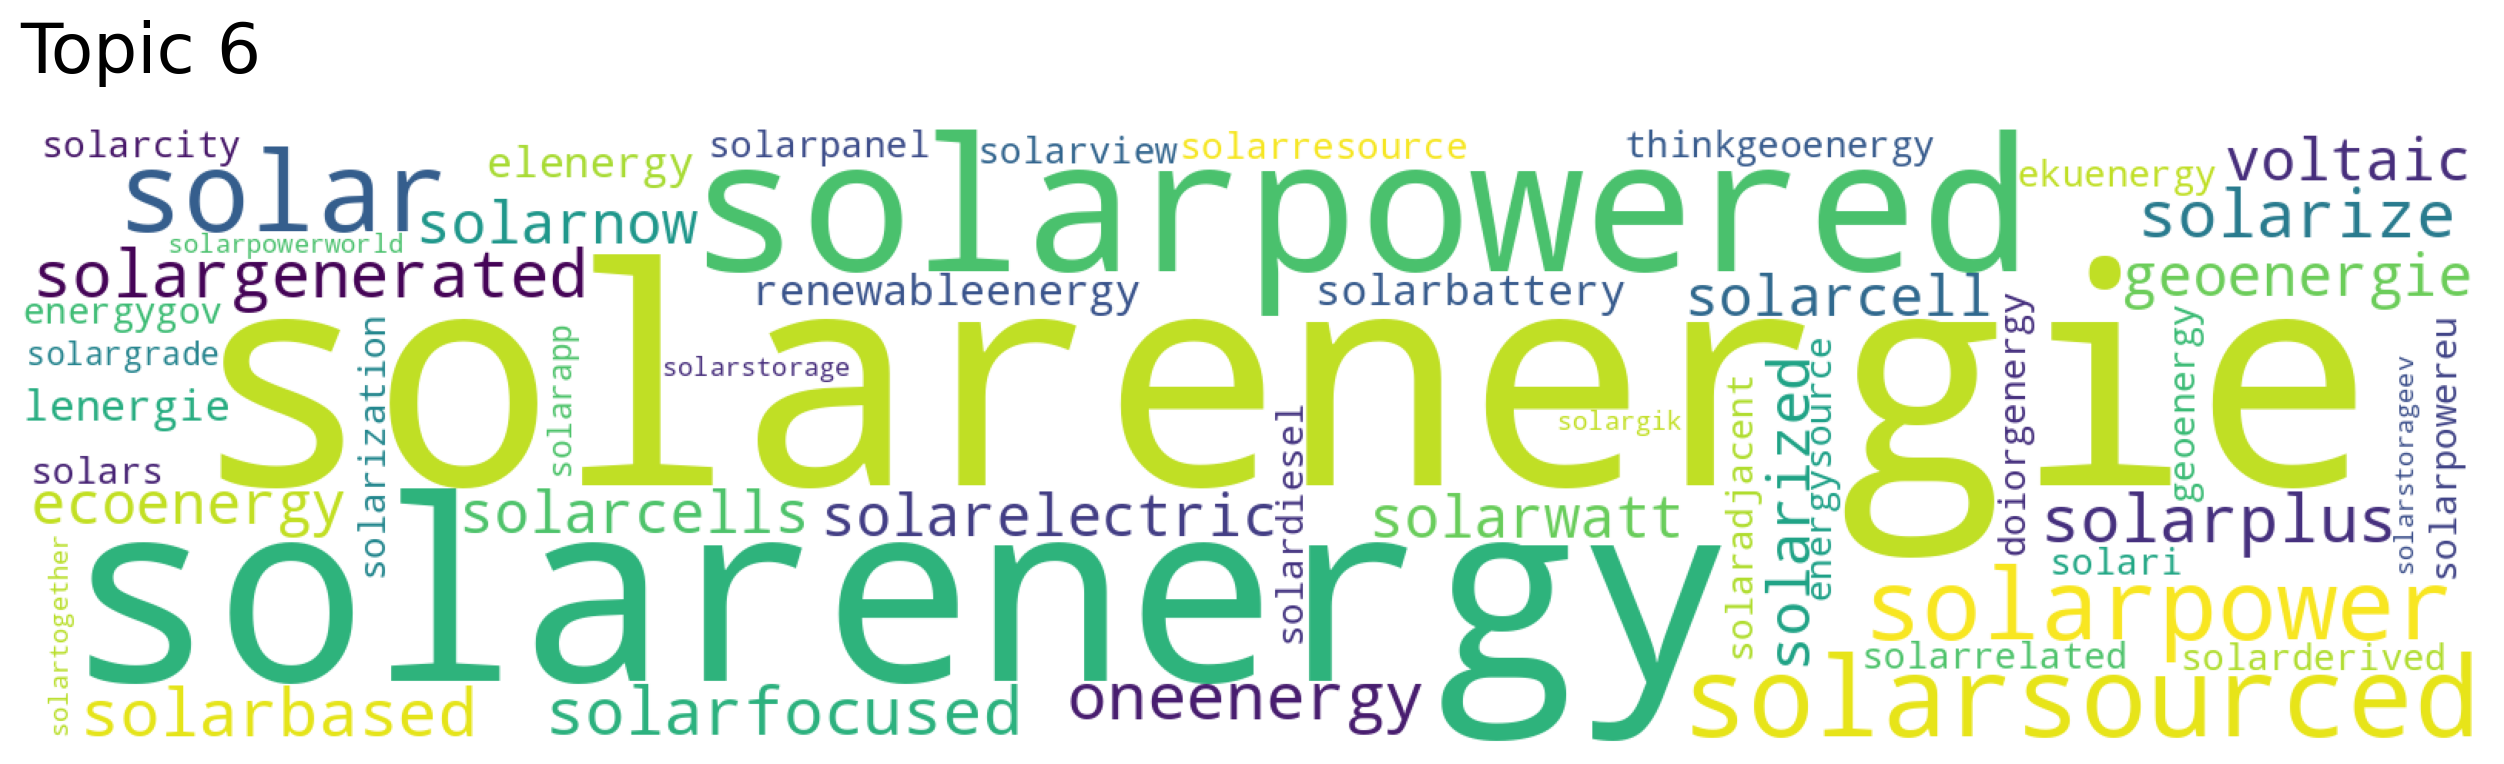

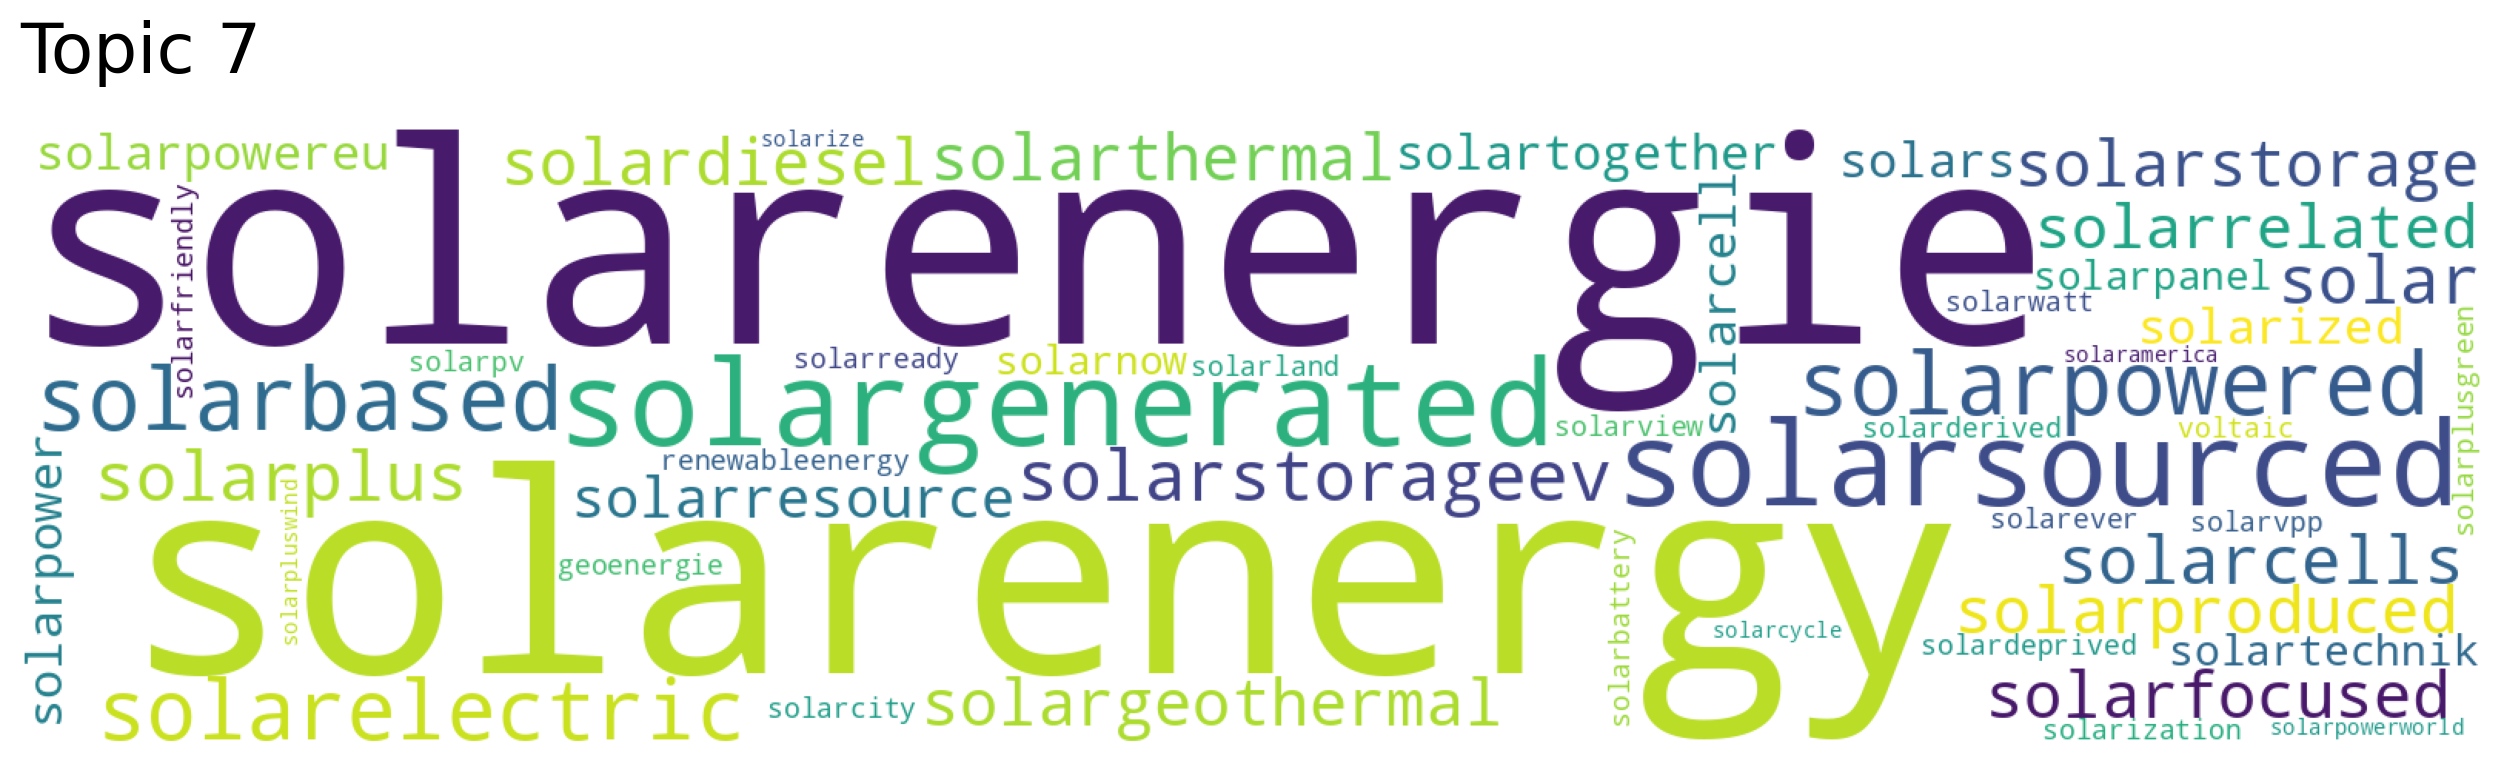

In [152]:
plt.figure(figsize=(2, 2))
model.generate_topic_wordcloud(0, background_color='white', reduced=True)
model.generate_topic_wordcloud(1, background_color='white', reduced=True)
model.generate_topic_wordcloud(2, background_color='white', reduced=True)
model.generate_topic_wordcloud(3, background_color='white', reduced=True)
model.generate_topic_wordcloud(4, background_color='white', reduced=True)
model.generate_topic_wordcloud(5, background_color='white', reduced=True)
model.generate_topic_wordcloud(6, background_color='white', reduced=True)
model.generate_topic_wordcloud(7, background_color='white', reduced=True)
plt.axis('off')
plt.show()

In [162]:
# Trying to figure out how to visualize the clusters of topics in a plot. WIP

# import umap

# umap_model = umap.UMAP(umap_args).fit(model.compute_topics()reshape(-1,1))
# umap.plot.points(umap_model, labels=model.doc_top)

SyntaxError: ignored

## BERTopic Modelling

In [ ]:
contents = df["content"]
titles = df["title"]

In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from bertopic import BERTopic

In [ ]:
# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(contents, show_progress_bar=True)

In [ ]:
#Umap model
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

#hdbscan model
hdbscan_model = HDBSCAN(min_cluster_size=35, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

#vectorizer model
vectorizer_model = CountVectorizer(stop_words=stop_words_spacy, min_df=2, ngram_range=(1, 2))

# KeyBERT
keybert_model = KeyBERTInspired()

# Part-of-Speech
pos_model = PartOfSpeech("en_core_web_sm")

# MMR
mmr_model = MaximalMarginalRelevance(diversity=0.3)

# All representation models
representation_model = {
    "KeyBERT": keybert_model,
    "MMR": mmr_model,
    "POS": pos_model
}

In [ ]:
topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(contents, embeddings)

In [ ]:
topic_model.get_topic_info()

In [ ]:
representative_docs = topic_model.get_representative_docs(topic=0)
representative_docs[0][:500]

In [ ]:
topic_model.get_topic(0, full=True)

In [ ]:
topic_distr, _ = topic_model.approximate_distribution(contents, window=8, stride=4)

In [ ]:
content_id = 10
print(contents[content_id][:500])

In [ ]:
topic_model.visualize_distribution(topic_distr[content_id])

In [ ]:
# Reduce outliers
new_topics = topic_model.reduce_outliers(contents, topics)

# Reduce outliers with pre-calculate embeddings instead
new_topics = topic_model.reduce_outliers(contents, topics, strategy="embeddings", embeddings=embeddings)

In [ ]:
#topic_model.update_topics(contents, topics=new_topics)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_hierarchy(custom_labels=True)

In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

In [ ]:
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings, custom_labels=True)

In [ ]:
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings, custom_labels=True, hide_annotations=True)